<a href="https://colab.research.google.com/github/p3dr0id/covid19oesteba/blob/main/covid19_municipios_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de dados da Covid-19 nos municípios da macrorregião do oeste da Bahia**



*   Implementação das comparações entre previsões
*   Geração de tabela com os dados de previsão para serem inseridos no Boletim
*   Usando dados da tabela nova que foi pré-processada









# Tratamento e análise de dados

## Coleta e tratamento dos dados

### Importação de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # importando a biblioteca matiplotlib para geração de gráficos
from matplotlib.ticker import MaxNLocator, AutoMinorLocator, FormatStrFormatter# para forçar que os valores do eixo sejam apenas números inteiros
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes # serve para fazer inserção de gráficos como subplots
import datetime
import pytz
import time
from google.colab import drive, auth
from oauth2client.client import GoogleCredentials
!pip install gspread_pandas==3.0.0
import gspread

  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


### Importa dados do google drive e cria dataframes

In [ ]:
# Importa planilha de dados diretamente do google drive com a biblioteca gspread e cria um dataframe com a biblioteca pandas
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1KcTYpDBnYSchsPHAw-MYDZJQXMDDowJG0cBPR3JDyKE/edit?usp=sharing') # A URL of your workbook.
drive.mount('drive', force_remount=True) # Monta meu google drive para salvar os dataframes e figuras
sheet1 = wb.worksheet('Casos Acumulados') # Enter your sheet name.
sheet2 = wb.worksheet('Óbitos Acumulados') # Enter your sheet name.
sheet3 = wb.worksheet('Ativos') # Enter your sheet name.
sheet4 = wb.worksheet('Recuperados') # Enter your sheet name.
sheet5 = wb.worksheet('Ocupação de Leitos') # Enter your sheet name.
df1 = sheet1.get_all_values()
df2 = sheet2.get_all_values()
df3 = sheet3.get_all_values()
df4 = sheet4.get_all_values()
df5 = sheet5.get_all_values()
df_casos = pd.DataFrame(df1)
df_obitos = pd.DataFrame(df2)
df_ativos = pd.DataFrame(df3)
df_recuperados = pd.DataFrame(df4)
df_leitos = pd.DataFrame(df5)

Mounted at drive


### Visualização do dataframe criado a partir da planilha do GTG-Covid-19 UFOB

In [ ]:
df_casos.head(37)

0           1           2           3           4    \
0                    Cidade  2020-03-21  2020-03-22  2020-03-23  2020-03-24   
1                   Angical           0           0           0           0   
2               Baianópolis           0           0           0           0   
3                     Barra           0           0           0           0   
4                 Barreiras           1           1           1           1   
5         Bom Jesus da Lapa           0           0           0           0   
6               Brejolândia           0           0           0           0   
7        Brotas de Macaúbas           0           0           0           0   
8                Buritirama           0           0           0           0   
9                 Canápolis           0           0           0           0   
10               Catolândia           0           0           0           0   
11                    Cocos           0           0           0           0   
12                   Coribe           0           0           0           0   
13               Correntina           0           0           0           0   
14                 Cotegipe           0           0           0           0   
15              Cristópolis           0           0           0           0   
16     Formosa do Rio Preto           0           0           0           0   
17                Ibotirama           0           0           0           0   
18                 Ipupiara           0           0           0           0   
19                Jaborandi           0           0           0           0   
20   Luís Eduardo Magalhães           0           0           0           0   
21                 Mansidão           0           0           0           0   
22                  Morpará           0           0           0           0   
23  Muquém do São Francisco           0           0           0           0   
24   Oliveira dos Brejinhos           0           0           0           0   
25                Paratinga           0           0           0           0   
26        Riachão das Neves           0           0           0           0   
27   Santa Maria da Vitória           0           0           0           0   
28     Santa Rita de Cássia           0           0           0           0   
29                  Santana           0           0           0           0   
30            São Desidério           0           0           0           0   
31      São Félix do Coribe           0           0           0           0   
32         Serra do Ramalho           0           0           0           0   
33            Serra Dourada           0           0           0           0   
34            Sítio do Mato           0           0           0           0   
35   Tabocas do Brejo Velho           0           0           0           0   
36                Wanderley           0           0           0           0   

           5           6           7           8           9    ...  \
0   2020-03-25  2020-03-26  2020-03-27  2020-03-28  2020-03-29  ...   
1            0           0           0           0           0  ...   
2            0           0           0           0           0  ...   
3            0           0           0           0           0  ...   
4            1           1           1           1           1  ...   
5            0           0           0           0           0  ...   
6            0           0           0           0           0  ...   
7            0           0           0           0           0  ...   
8            0           0           0           0           0  ...   
9            0           0           0           0           0  ...   
10           0           0           0           0           0  ...   
11           0           0           0           0           0  ...   
12           0           0           0           0           0  ...   
13           0           0 

In [ ]:
df_obitos.head(37)

0           1           2           3           4    \
0                    Cidade  2020-05-10  2020-05-11  2020-05-12  2020-05-13   
1                   Angical           0           0           0           0   
2               Baianópolis           0           0           0           0   
3                     Barra           0           0           0           0   
4                 Barreiras           0           0           0           0   
5         Bom Jesus da Lapa           0           0           0           0   
6               Brejolândia           0           0           0           0   
7        Brotas de Macaúbas           0           0           0           0   
8                Buritirama           0           0           0           0   
9                 Canápolis           0           0           0           0   
10               Catolândia           0           0           0           0   
11                    Cocos           0           0           0           0   
12                   Coribe           0           0           0           0   
13               Correntina           0           0           0           0   
14                 Cotegipe           0           0           0           0   
15              Cristópolis           1           1           1           1   
16     Formosa do Rio Preto           0           0           0           0   
17                Ibotirama           0           0           0           0   
18                 Ipupiara           0           0           0           0   
19                Jaborandi           0           0           0           0   
20   Luís Eduardo Magalhães           0           0           0           0   
21                 Mansidão           0           0           0           0   
22                  Morpará           0           0           0           0   
23  Muquém do São Francisco           0           0           0           0   
24   Oliveira dos Brejinhos           0           0           0           0   
25                Paratinga           0           0           0           0   
26        Riachão das Neves           0           0           0           0   
27   Santa Maria da Vitória           0           0           0           1   
28     Santa Rita de Cássia           0           0           0           0   
29                  Santana           0           0           0           0   
30            São Desidério           0           0           0           0   
31      São Félix do Coribe           0           0           0           0   
32         Serra do Ramalho           0           0           0           0   
33            Serra Dourada           0           0           0           0   
34            Sítio do Mato           0           0           0           0   
35   Tabocas do Brejo Velho           0           0           0           0   
36                Wanderley           0           0           0           0   

           5           6           7           8           9    ...  \
0   2020-05-14  2020-05-15  2020-05-16  2020-05-17  2020-05-18  ...   
1            0           0           0           0           0  ...   
2            0           0           0           0           0  ...   
3            0           0           0           0           0  ...   
4            0           0           0           0           0  ...   
5            0           0           0           0           0  ...   
6            0           0           0           0           0  ...   
7            0           0           0           0           0  ...   
8            0           0           0           0           0  ...   
9            0           0           0           0           0  ...   
10           0           0           0           0           0  ...   
11           0           0           0           0           0  ...   
12           0           0           0           0           0  ...   
13           0           0 

### Seleção e pré-processamento dos dados de casos e óbitos acumulados

In [ ]:
# seleciona a região da planilha correspondente aos dados de casos e de óbitos acumulados da macrorregião

fim_col_casos = df_casos.columns[-1] # Valor alterado semanalmente
inicio_lin_casos = 1
fim_lin_casos = 36
fim_col_obitos = df_obitos.columns[-1]
inicio_lin_obitos = 1
fim_lin_obitos = 36

## para selecionar uma data específica descomente as três linhas abaixo
#data_escolhida = '2022-02-17'
#fim_col_casos = df_casos.iloc[0,:][df_casos.iloc[0,:] == data_escolhida].index.values[0] # busca o valor do indice a partir de uma data
#fim_col_obitos = df_obitos.iloc[0,:][df_obitos.iloc[0,:] == data_escolhida].index.values[0]
## para selecionar uma data específica descomente as três linhas acima

casos_acumulados = df_casos.loc[inicio_lin_casos:fim_lin_casos,1:fim_col_casos].copy()
obitos_acumulados = df_obitos.loc[inicio_lin_obitos:fim_lin_obitos,1:fim_col_obitos].copy()

casos_acumulados = casos_acumulados.reset_index(drop=True).copy() #reseta índices
casos_acumulados = casos_acumulados.T.reset_index(drop=True).copy() #transpõe o dataframe onde as colunas passam ser as cidades e as linhas os dias
obitos_acumulados = obitos_acumulados.reset_index(drop=True).copy() 
obitos_acumulados = obitos_acumulados.T.reset_index(drop=True).copy()

# Remove espaços, pontos e converte valores para números inteiros
for col in casos_acumulados.columns:
  casos_acumulados[col] = casos_acumulados[col].astype(str).str.strip()
  casos_acumulados[col] = casos_acumulados[col].str.replace('\.','').astype(int)
for col in obitos_acumulados.columns:
  obitos_acumulados[col] = obitos_acumulados[col].astype(str).str.strip()
  obitos_acumulados[col] = obitos_acumulados[col].str.replace('\.','').astype(int)

casos_ac = casos_acumulados.copy()
obitos_ac = obitos_acumulados.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: The default value of regex will change from True to False in a future version.


## Criação de dataframes para os casos/óbitos acumulados e novos de todas as cidades

### Criando dataframes com séries temporais

In [ ]:
cidades = df_casos.loc[inicio_lin_casos:fim_lin_casos,0].str.strip().copy() # seleciona coluna com as cidades da macrorregião e remove espaços
cidades = cidades.reset_index(drop=True).copy( ) # reseta os índices
cidades

0                     Angical
1                 Baianópolis
2                       Barra
3                   Barreiras
4           Bom Jesus da Lapa
5                 Brejolândia
6          Brotas de Macaúbas
7                  Buritirama
8                   Canápolis
9                  Catolândia
10                      Cocos
11                     Coribe
12                 Correntina
13                   Cotegipe
14                Cristópolis
15       Formosa do Rio Preto
16                  Ibotirama
17                   Ipupiara
18                  Jaborandi
19     Luís Eduardo Magalhães
20                   Mansidão
21                    Morpará
22    Muquém do São Francisco
23     Oliveira dos Brejinhos
24                  Paratinga
25          Riachão das Neves
26     Santa Maria da Vitória
27       Santa Rita de Cássia
28                    Santana
29              São Desidério
30        São Félix do Coribe
31           Serra do Ramalho
32              Serra Dourada
33        

In [ ]:
cidades.values

array(['Angical', 'Baianópolis', 'Barra', 'Barreiras',
       'Bom Jesus da Lapa', 'Brejolândia', 'Brotas de Macaúbas',
       'Buritirama', 'Canápolis', 'Catolândia', 'Cocos', 'Coribe',
       'Correntina', 'Cotegipe', 'Cristópolis', 'Formosa do Rio Preto',
       'Ibotirama', 'Ipupiara', 'Jaborandi', 'Luís Eduardo Magalhães',
       'Mansidão', 'Morpará', 'Muquém do São Francisco',
       'Oliveira dos Brejinhos', 'Paratinga', 'Riachão das Neves',
       'Santa Maria da Vitória', 'Santa Rita de Cássia', 'Santana',
       'São Desidério', 'São Félix do Coribe', 'Serra do Ramalho',
       'Serra Dourada', 'Sítio do Mato', 'Tabocas do Brejo Velho',
       'Wanderley'], dtype=object)

In [ ]:
for i in range(len(casos_ac.columns)):
  casos_ac.rename(columns={casos_ac.columns[i]:cidades[i]}, inplace=True)
for i in range(len(obitos_ac.columns)):
  obitos_ac.rename(columns={obitos_ac.columns[i]:cidades[i]}, inplace=True)

In [ ]:
obitos_ac

Angical  Baianópolis  Barra  Barreiras  Bom Jesus da Lapa  Brejolândia  \
0          0            0      0          0                  0            0   
1          0            0      0          0                  0            0   
2          0            0      0          0                  0            0   
3          0            0      0          0                  0            0   
4          0            0      0          0                  0            0   
..       ...          ...    ...        ...                ...          ...   
658       20           22     63        342                102           12   
659       20           22     63        342                102           12   
660       20           22     63        342                102           12   
661       20           22     63        342                102           12   
662       20           22     63        342                102           12   

     Brotas de Macaúbas  Buritirama  Canápolis  Catolândia  ...  \
0                     0           0          0           0  ...   
1                     0           0          0           0  ...   
2                     0           0          0           0  ...   
3                     0           0          0           0  ...   
4                     0           0          0           0  ...   
..                  ...         ...        ...         ...  ...   
658                   7          22         11           1  ...   
659                   7          22         11           1  ...   
660                   7          22         11           1  ...   
661                   7          22         11           1  ...   
662                   7          22         11           1  ...   

     Santa Maria da Vitória  Santa Rita de Cássia  Santana  São Desidério  \
0                         0                     0        0              0   
1                         0                     0        0              0   
2                         0                     0        0              0   
3                         1                     0        0              0   
4                         1                     0        0              0   
..                      ...                   ...      ...            ...   
658                      71                    44       38             50   
659                      71                    44       38             50   
660                      71                    44       38             50   
661                      71                    44       38             50   
662                      71                    44       38             50   

     São Félix do Coribe  Serra do Ramalho  Serra Dourada  Sítio do Mato  \
0                      0                 0              0              0   
1                      0                 0              0              0   
2                      0                 0              0              0   
3                      0                 0              0              0   
4                      0                 0              0              0   
..                   ...               ...            ...            ...   
658                   33                42             23             13   
659                   33                42             23             13   
660                   33                42             23             13   
661                   33                42             23             13   
662                   34                43             23             13   

     Tabocas do Brejo Velho  Wanderley  
0                         0          0  
1                         0          0  
2                         0          0  
3                         0          0  
4                         0          0  
..                      ...        ...  
658                      12         31  
659                      12         31  
660                      13         31  
661

In [ ]:
datas_casos = pd.date_range(start='2020-03-21', periods=len(casos_ac.index), freq='D') # cria lista de datas a partir do dia 21/03/2020 até o dia atual (para casos acumulados)
datas_obitos = pd.date_range(start='2020-05-10', periods=len(obitos_ac.index), freq='D') # cria lista de datas a partir do dia 10/05/2020 até o dia atual (para casos acumulados)
datas_obitos

DatetimeIndex(['2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19',
               ...
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
               '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01',
               '2022-03-02', '2022-03-03'],
              dtype='datetime64[ns]', length=663, freq='D')

In [ ]:
# inserre coluna de datas nos dataframes
casos_ac.insert(0, 'data', datas_casos)
obitos_ac.insert(0,'data',datas_obitos)

In [ ]:
obitos_ac

data  Angical  Baianópolis  Barra  Barreiras  Bom Jesus da Lapa  \
0   2020-05-10        0            0      0          0                  0   
1   2020-05-11        0            0      0          0                  0   
2   2020-05-12        0            0      0          0                  0   
3   2020-05-13        0            0      0          0                  0   
4   2020-05-14        0            0      0          0                  0   
..         ...      ...          ...    ...        ...                ...   
658 2022-02-27       20           22     63        342                102   
659 2022-02-28       20           22     63        342                102   
660 2022-03-01       20           22     63        342                102   
661 2022-03-02       20           22     63        342                102   
662 2022-03-03       20           22     63        342                102   

     Brejolândia  Brotas de Macaúbas  Buritirama  Canápolis  ...  \
0              0                   0           0          0  ...   
1              0                   0           0          0  ...   
2              0                   0           0          0  ...   
3              0                   0           0          0  ...   
4              0                   0           0          0  ...   
..           ...                 ...         ...        ...  ...   
658           12                   7          22         11  ...   
659           12                   7          22         11  ...   
660           12                   7          22         11  ...   
661           12                   7          22         11  ...   
662           12                   7          22         11  ...   

     Santa Maria da Vitória  Santa Rita de Cássia  Santana  São Desidério  \
0                         0                     0        0              0   
1                         0                     0        0              0   
2                         0                     0        0              0   
3                         1                     0        0              0   
4                         1                     0        0              0   
..                      ...                   ...      ...            ...   
658                      71                    44       38             50   
659                      71                    44       38             50   
660                      71                    44       38             50   
661                      71                    44       38             50   
662                      71                    44       38             50   

     São Félix do Coribe  Serra do Ramalho  Serra Dourada  Sítio do Mato  \
0                      0                 0              0              0   
1                      0                 0              0              0   
2                      0                 0              0              0   
3                      0                 0              0              0   
4                      0                 0              0              0   
..                   ...               ...            ...            ...   
658                   33                42             23             13   
659                   33                42             23             13   
660                   33                42             23             13   
661                   33                42             23             13   
662                   34                43             23             13   

     Tabocas do Brejo Velho  Wanderley  
0                         0          0  
1                         0          0  
2                         0          0  
3                         0          0  
4                         0          0  
..                      ...        ...  
658                      12         31  
659                      12         31  
660                      13         31  
661                 

### Cria dataframes de casos e óbitos novos em um período definido

In [ ]:
def cria_dataframe_periodo(data, cidade, df_acumulado, periodo):
  df_novos = pd.DataFrame({'data': data})
  for i in range(len(cidade)):
    df_novos[cidade[i]] = df_acumulado[cidade[i]] - df_acumulado[cidade[i]].shift(periodo)

  # Preenche com zeros o primeiro dia e converte números para inteiros
  for i in range (len(cidade)):
    df_novos[cidade[i]] = df_novos[cidade[i]].fillna(0).astype(int)

  # Substituir valores negativos por zero (alternativa enquanto os dados não são corrigidos)
  for i in range(len(cidade)):
    df_novos[cidade[i]] = df_novos[cidade[i]].apply(lambda x : 0 if x < 0 else x)
  return df_novos

In [ ]:
periodo = 1 # novos diários
casos_nv = cria_dataframe_periodo(datas_casos, cidades, casos_ac, periodo)
obitos_nv = cria_dataframe_periodo(datas_obitos, cidades, obitos_ac, periodo)

In [ ]:
periodo = 14 # novos em duas semanas
casos_nv_sem = cria_dataframe_periodo(datas_casos, cidades, casos_ac, periodo)
obitos_nv_sem = cria_dataframe_periodo(datas_obitos, cidades, obitos_ac, periodo)

In [ ]:
casos_med_movel = casos_nv.copy()
casos_var_per_14dias = casos_med_movel.copy()
obitos_med_movel = obitos_nv.copy()
obitos_var_per_14dias = obitos_med_movel.copy()
for i in range(len(cidades)):
  casos_med_movel[cidades[i]] = casos_nv[cidades[i]].rolling(7).mean() # acrescenta coluna ao dataframe com média móvel
  casos_med_movel = casos_med_movel.round({cidades[i]: 0}).fillna(0).copy()
  casos_med_movel[cidades[i]] = casos_med_movel[cidades[i]].astype(int)
  obitos_med_movel[cidades[i]] = obitos_nv[cidades[i]].rolling(7).mean() # acrescenta coluna ao dataframe com média móvel
  obitos_med_movel = obitos_med_movel.round({cidades[i]: 0}).fillna(0).copy()
  obitos_med_movel[cidades[i]] = obitos_med_movel[cidades[i]].astype(int)
for i in range(len(cidades)):
  casos_var_per_14dias[cidades[i]] = round( (casos_med_movel[cidades[i]] - casos_med_movel[cidades[i]].shift(13)) 
  / casos_med_movel[cidades[i]].shift(13) * 100, 1)
  casos_var_per_14dias[cidades[i]] = casos_var_per_14dias[cidades[i]].fillna(0)
  obitos_var_per_14dias[cidades[i]] = round( (obitos_med_movel[cidades[i]] - obitos_med_movel[cidades[i]].shift(13)) 
  / obitos_med_movel[cidades[i]].shift(13) * 100, 1)
  obitos_var_per_14dias[cidades[i]] = obitos_var_per_14dias[cidades[i]].fillna(0)

### Plot dos dados com todas as cidades

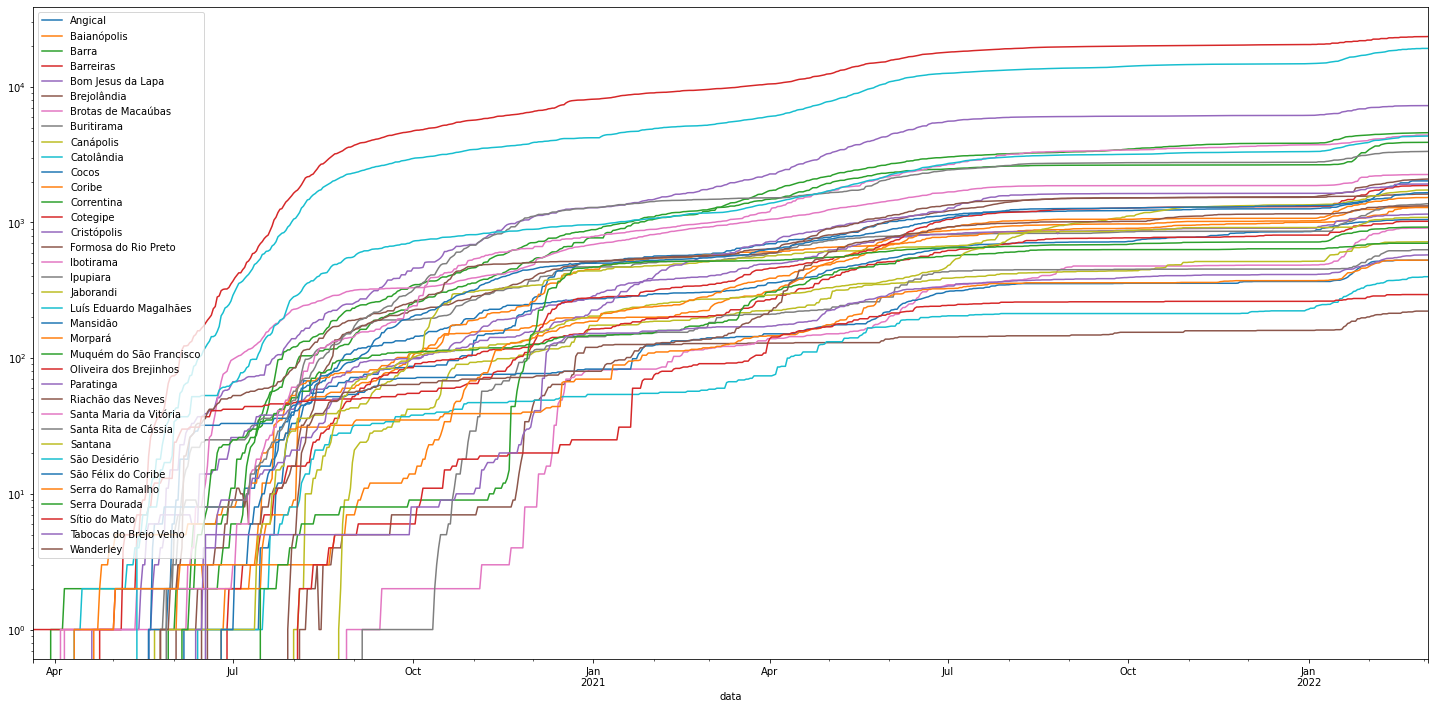

In [ ]:
casos_ac.set_index('data').plot(figsize=(25,12), logy=True)

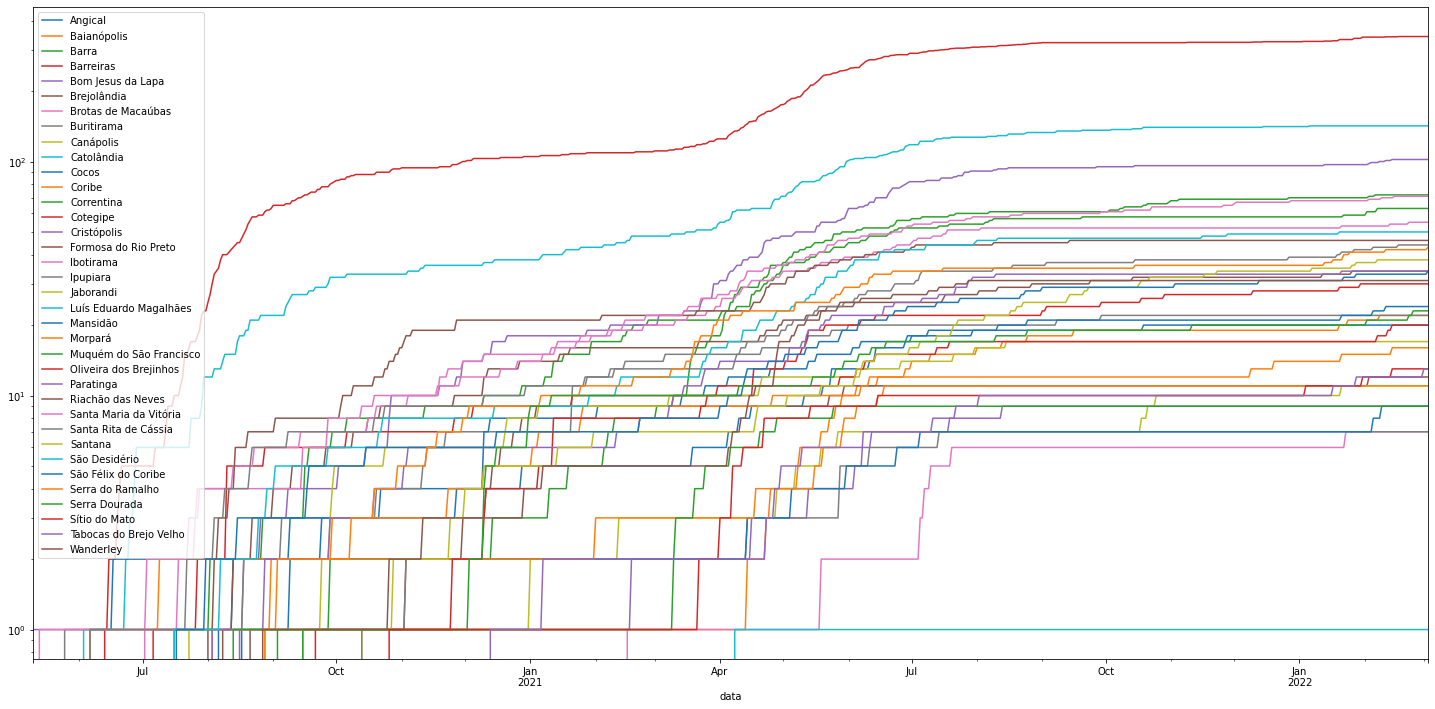

In [ ]:
obitos_ac.set_index('data').plot(figsize=(25,12), logy=True)

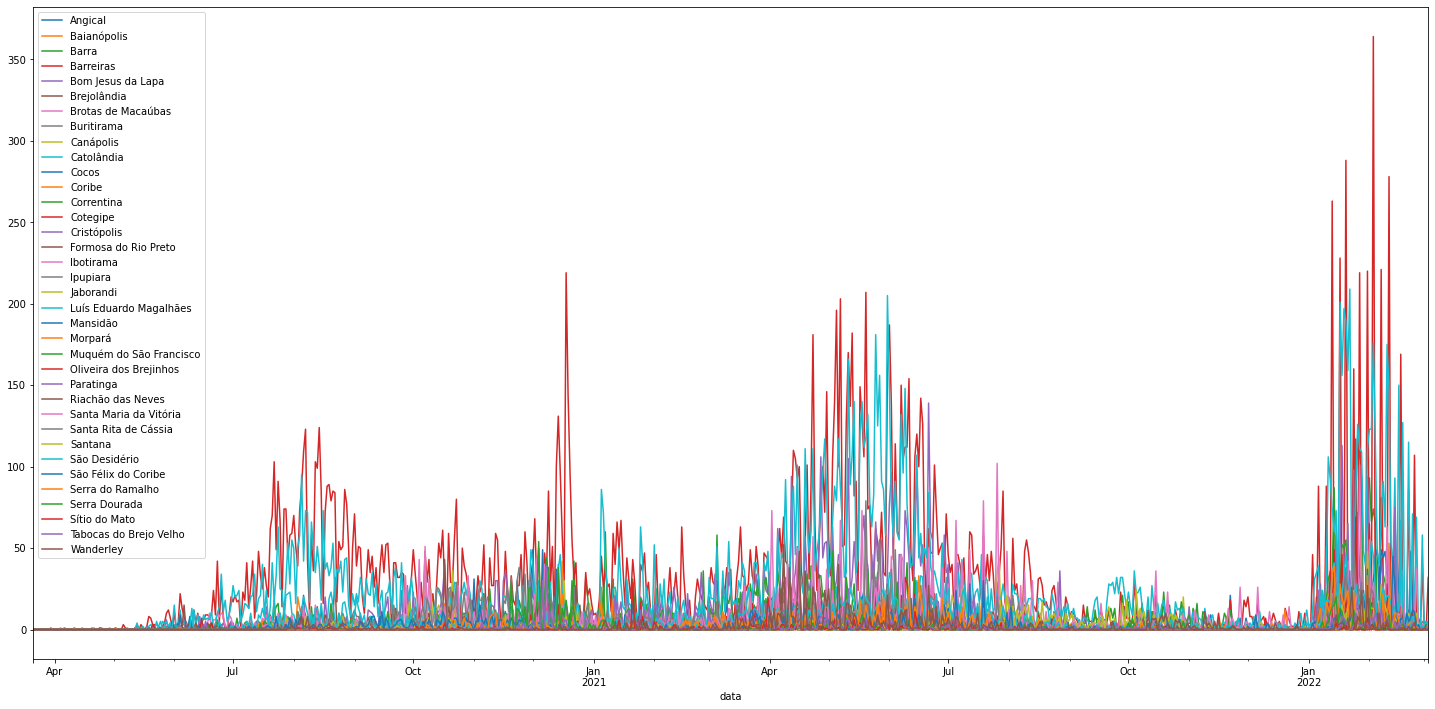

In [ ]:
casos_nv.set_index('data').plot(figsize=(25,12))

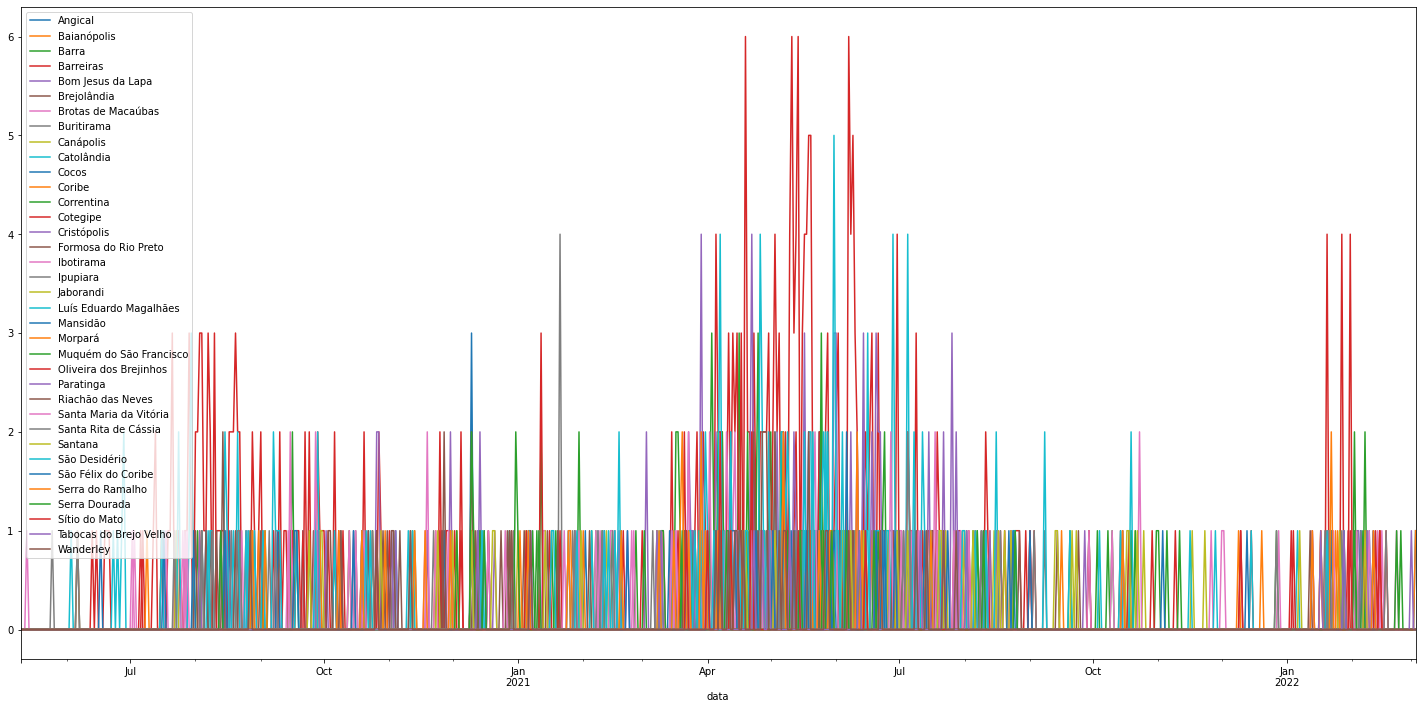

In [ ]:
obitos_nv.set_index('data').plot(figsize=(25,12))

## Modelo relacional dos dados

### Criação dos dataframes relacionais (incrementar essa parte com todos os dados tratados para criar uma base para o github)

In [ ]:
def cria_dataframe_relacional(data, cidade, df_serie, nome):
  df_temp = df_serie.copy()
  df_temp.drop('data', inplace=True, axis=1) # remove a coluna datas
  df_temp = df_temp.T.reset_index(drop=True).copy() #transpõe o dataframe e reseta nome de cidades
  df_rel = df_temp.copy()

  for i in range(len(data)):
    df_rel.rename(columns={df_rel.columns[i]:data[i]}, inplace=True) # renomeia as colunas com as datas

  df_rel.insert(0, 'cidade', cidade) # insere coluna com as cidades
  df_rel = df_rel.set_index(['cidade']).T.copy()
  df_rel = df_rel.stack(level=0).reset_index().rename(columns={'level_0':'data',0:nome}).copy()

  return df_rel

In [ ]:
df_rel_ac = cria_dataframe_relacional(datas_casos, cidades, casos_ac, 'casos')
df_rel_nv = cria_dataframe_relacional(datas_casos, cidades, casos_nv, 'casos_novos')
df_rel_ob_ac = cria_dataframe_relacional(datas_obitos, cidades, obitos_ac, 'obitos')
df_rel_ob_nv = cria_dataframe_relacional(datas_obitos, cidades, obitos_nv, 'obitos_novos')
df_rel_nv_sem = cria_dataframe_relacional(datas_casos, cidades, casos_nv_sem, 'casos_novos_2sem')
df_rel_ob_nv_sem = cria_dataframe_relacional(datas_obitos, cidades, obitos_nv_sem, 'obitos_novos_2sem')
df_rel_nv_med_movel = cria_dataframe_relacional(datas_casos, cidades, casos_med_movel, 'media_movel_casos')
df_rel_var_perc_14dias_nv = cria_dataframe_relacional(datas_casos, cidades, casos_var_per_14dias, 'var_%_14dias_casos')
df_rel_ob_nv_med_movel = cria_dataframe_relacional(datas_obitos, cidades, obitos_med_movel, 'media_movel_obitos')
df_rel_var_perc_14dias_ob_nv = cria_dataframe_relacional(datas_obitos, cidades, obitos_var_per_14dias, 'var_%_14dias_obitos')

In [ ]:
df_rel_casos = pd.concat([df_rel_ac.set_index('data'),
                          df_rel_nv.set_index('data')[['casos_novos']],
                          df_rel_nv_med_movel.set_index('data')[['media_movel_casos']],
                          df_rel_var_perc_14dias_nv.set_index('data')[['var_%_14dias_casos']]], axis=1)

df_rel_obitos = pd.concat([df_rel_ob_ac.set_index('data'),
                           df_rel_ob_nv.set_index('data')[['obitos_novos']],
                           df_rel_ob_nv_med_movel.set_index('data')[['media_movel_obitos']],
                           df_rel_var_perc_14dias_ob_nv.set_index('data')[['var_%_14dias_obitos']]], axis=1)

In [ ]:
df_rel_obitos

cidade  obitos  obitos_novos  media_movel_obitos  \
data                                                                           
2020-05-10                 Angical       0             0                   0   
2020-05-10             Baianópolis       0             0                   0   
2020-05-10                   Barra       0             0                   0   
2020-05-10               Barreiras       0             0                   0   
2020-05-10       Bom Jesus da Lapa       0             0                   0   
...                            ...     ...           ...                 ...   
2022-03-03        Serra do Ramalho      43             1                   0   
2022-03-03           Serra Dourada      23             0                   0   
2022-03-03           Sítio do Mato      13             0                   0   
2022-03-03  Tabocas do Brejo Velho      13             0                   0   
2022-03-03               Wanderley      31             0                   0   

            var_%_14dias_obitos  
data                             
2020-05-10                  0.0  
2020-05-10                  0.0  
2020-05-10                  0.0  
2020-05-10                  0.0  
2020-05-10                  0.0  
...                         ...  
2022-03-03                  0.0  
2022-03-03                  0.0  
2022-03-03                  0.0  
2022-03-03                  0.0  
2022-03-03                  0.0  

[23868 rows x 5 columns]

### Figuras de experimentais

In [ ]:
casos_ac_macro = df_rel_ac.groupby('data').agg({'casos': 'sum'}).copy()
obitos_ac_macro = df_rel_ob_ac.groupby('data').agg({'obitos': 'sum'}).copy()

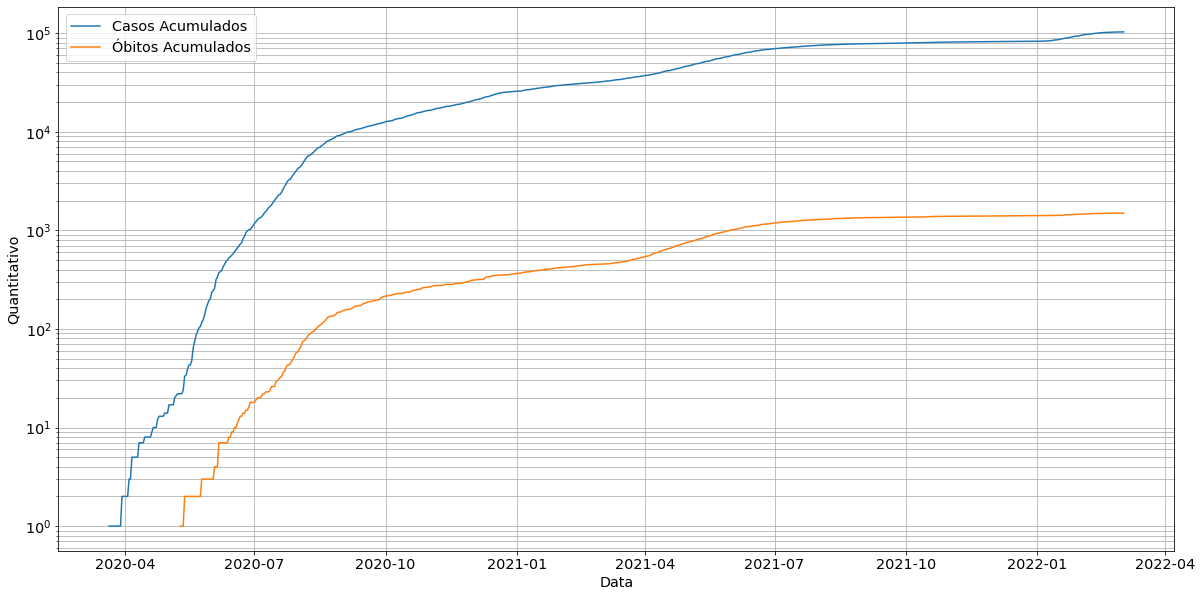

In [ ]:
d1 = casos_ac_macro.reset_index().copy()
d2 = obitos_ac_macro.reset_index().copy()
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.plot(d1.data, d1.casos)
plt.plot(d2.data, d2.obitos)
plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Quantitativo')
plt.grid(True, which='both')
plt.legend(['Casos Acumulados', 'Óbitos Acumulados'])
#plt.savefig("casos_obitos_ac_logscale.png")
#files.download("casos_obitos_ac_logscale.png")

In [ ]:
populacao = pd.Series([13977, 13877, 155439, 10557, 3577, 13782, 13910, 25591, 87519, 13643, 22339, 28338, 
                       33742, 12518, 12238, 69148, 9711, 18777, 14194, 32137, 8385, 39845, 26614, 15391, 18320, 
                       31472, 13012, 53578, 10231, 21174, 26927, 9865, 8519, 11348, 21825, 32000])
cidades_por_micro=['Angical', 'Baianópolis', 'Barreiras', 'Brejolândia', 'Catolândia',
                   'Cotegipe', 'Cristópolis', 'Formosa do Rio Preto',
                   'Luís Eduardo Magalhães', 'Mansidão', 'Riachão das Neves',
                   'Santa Rita de Cássia', 'São Desidério', 'Tabocas do Brejo Velho',
                   'Wanderley', 'Bom Jesus da Lapa', 'Canápolis', 'Cocos', 'Coribe',
                   'Correntina', 'Jaborandi', 'Santa Maria da Vitória', 'Santana',
                   'São Félix do Coribe', 'Serra Dourada', 'Serra do Ramalho',
                   'Sítio do Mato', 'Barra', 'Brotas de Macaúbas', 'Buritirama',
                   'Ibotirama', 'Ipupiara', 'Morpará', 'Muquém do São Francisco',
                   'Oliveira dos Brejinhos', 'Paratinga']

In [ ]:
# Cria dataframe com as cidades em uma coluna e as respetivas populações na segunda coluna
df_cid_pop = pd.DataFrame({'cidade':cidades_por_micro, 'populacao':populacao})
df_cid_pop

cidade  populacao
0                   Angical      13977
1               Baianópolis      13877
2                 Barreiras     155439
3               Brejolândia      10557
4                Catolândia       3577
5                  Cotegipe      13782
6               Cristópolis      13910
7      Formosa do Rio Preto      25591
8    Luís Eduardo Magalhães      87519
9                  Mansidão      13643
10        Riachão das Neves      22339
11     Santa Rita de Cássia      28338
12            São Desidério      33742
13   Tabocas do Brejo Velho      12518
14                Wanderley      12238
15        Bom Jesus da Lapa      69148
16                Canápolis       9711
17                    Cocos      18777
18                   Coribe      14194
19               Correntina      32137
20                Jaborandi       8385
21   Santa Maria da Vitória      39845
22                  Santana      26614
23      São Félix do Coribe      15391
24            Serra Dourada      18320
25         Serra do Ramalho      31472
26            Sítio do Mato      13012
27                    Barra      53578
28       Brotas de Macaúbas      10231
29               Buritirama      21174
30                Ibotirama      26927
31                 Ipupiara       9865
32                  Morpará       8519
33  Muquém do São Francisco      11348
34   Oliveira dos Brejinhos      21825
35                Paratinga      32000

In [ ]:
casos_ac

data  Angical  Baianópolis  Barra  Barreiras  Bom Jesus da Lapa  \
0   2020-03-21        0            0      0          1                  0   
1   2020-03-22        0            0      0          1                  0   
2   2020-03-23        0            0      0          1                  0   
3   2020-03-24        0            0      0          1                  0   
4   2020-03-25        0            0      0          1                  0   
..         ...      ...          ...    ...        ...                ...   
708 2022-02-27     1049         1287   3886      23342               7247   
709 2022-02-28     1049         1287   3887      23381               7247   
710 2022-03-01     1049         1287   3888      23381               7247   
711 2022-03-02     1049         1287   3889      23381               7250   
712 2022-03-03     1050         1287   3889      23413               7252   

     Brejolândia  Brotas de Macaúbas  Buritirama  Canápolis  ...  \
0              0                   0           0          0  ...   
1              0                   0           0          0  ...   
2              0                   0           0          0  ...   
3              0                   0           0          0  ...   
4              0                   0           0          0  ...   
..           ...                 ...         ...        ...  ...   
708          222                 907        1357        719  ...   
709          222                 908        1362        719  ...   
710          222                 908        1366        719  ...   
711          222                 908        1371        719  ...   
712          222                 910        1372        719  ...   

     Santa Maria da Vitória  Santa Rita de Cássia  Santana  São Desidério  \
0                         0                     0        0              0   
1                         0                     0        0              0   
2                         0                     0        0              0   
3                         0                     0        0              0   
4                         0                     0        0              0   
..                      ...                   ...      ...            ...   
708                    4396                  3326     1729           4313   
709                    4399                  3328     1729           4315   
710                    4399                  3328     1732           4317   
711                    4399                  3332     1732           4321   
712                    4399                  3335     1732           4326   

     São Félix do Coribe  Serra do Ramalho  Serra Dourada  Sítio do Mato  \
0                      0                 0              0              0   
1                      0                 0              0              0   
2                      0                 0              0              0   
3                      0                 0              0              0   
4                      0                 0              0              0   
..                   ...               ...            ...            ...   
708                 1652              1523            923            294   
709                 1652              1523            923            294   
710                 1652              1523            923            294   
711                 1655              1523            923            294   
712                 1656              1527            923            294   

     Tabocas do Brejo Velho  Wanderley  
0                         0          0  
1                         0          0  
2                         0          0  
3                         0          0  
4                         0          0  
..                      ...        ...  
708                     574       1322  
709                     575       1322  
710                     575       1323  
711                 

In [ ]:
# Cria dataframe para casos acumulados relativos onde divide-se o número de casos diário pela população e multiplica por 100k (padrão)
casos_ac_relativos = casos_ac.set_index('data')[cidades_por_micro].copy()
for i in range(len(cidades_por_micro)):
  casos_ac_relativos[cidades_por_micro[i]] = (casos_ac_relativos[cidades_por_micro[i]]/df_cid_pop.populacao[i])*100000

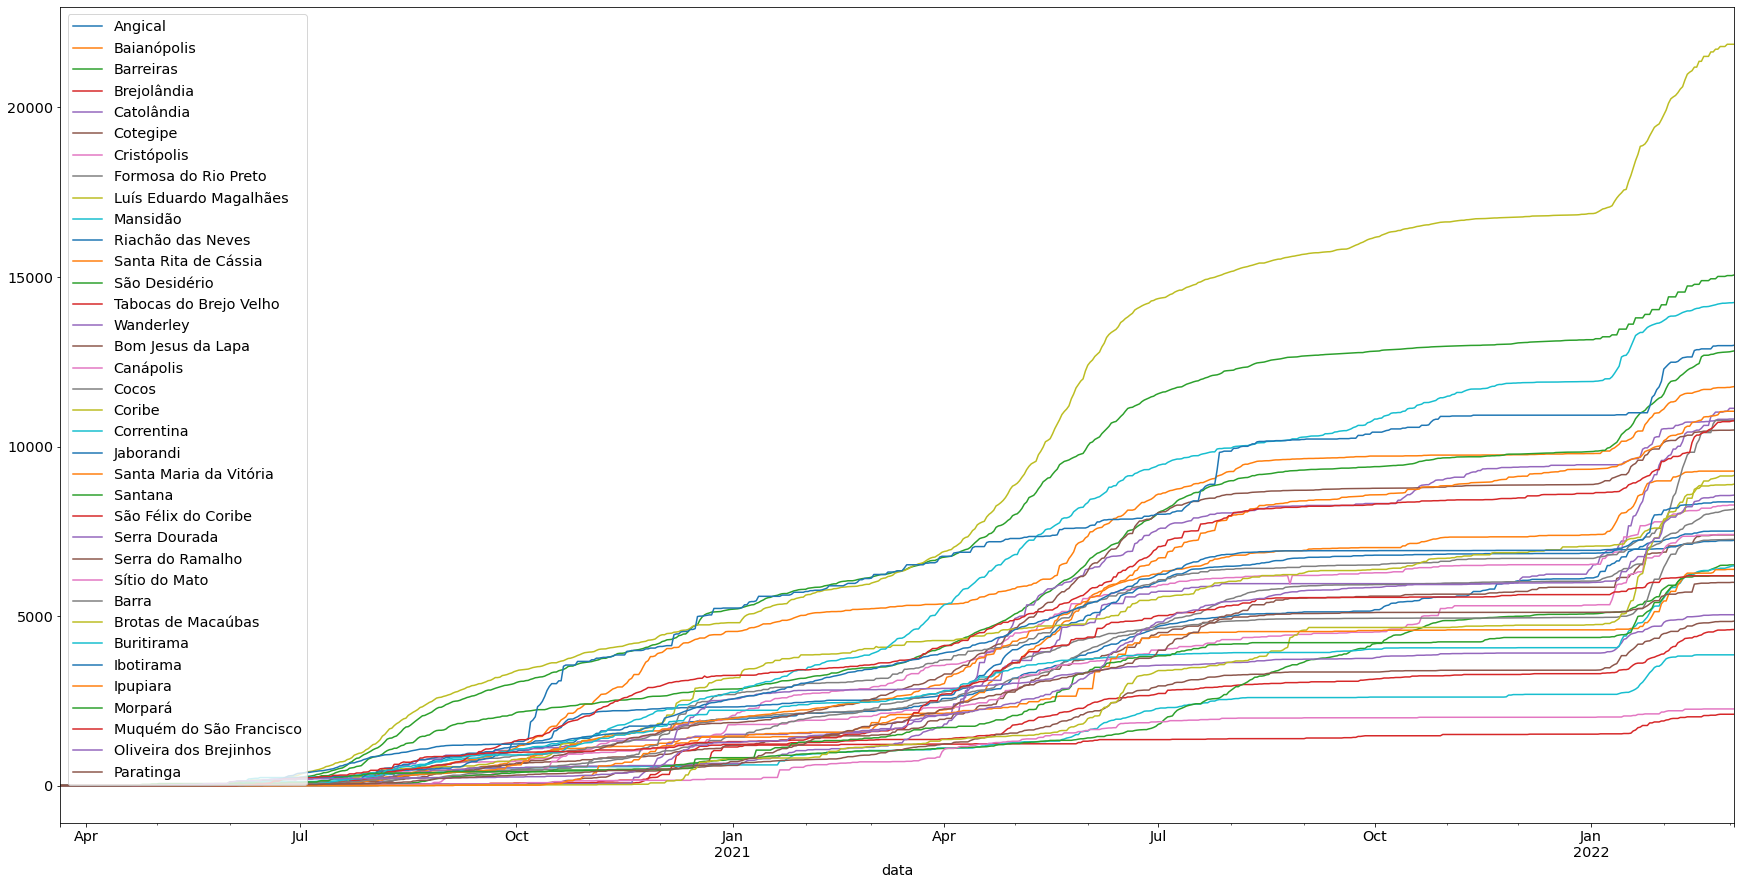

In [ ]:
casos_ac_relativos.plot(figsize=(30,15), logy=False)

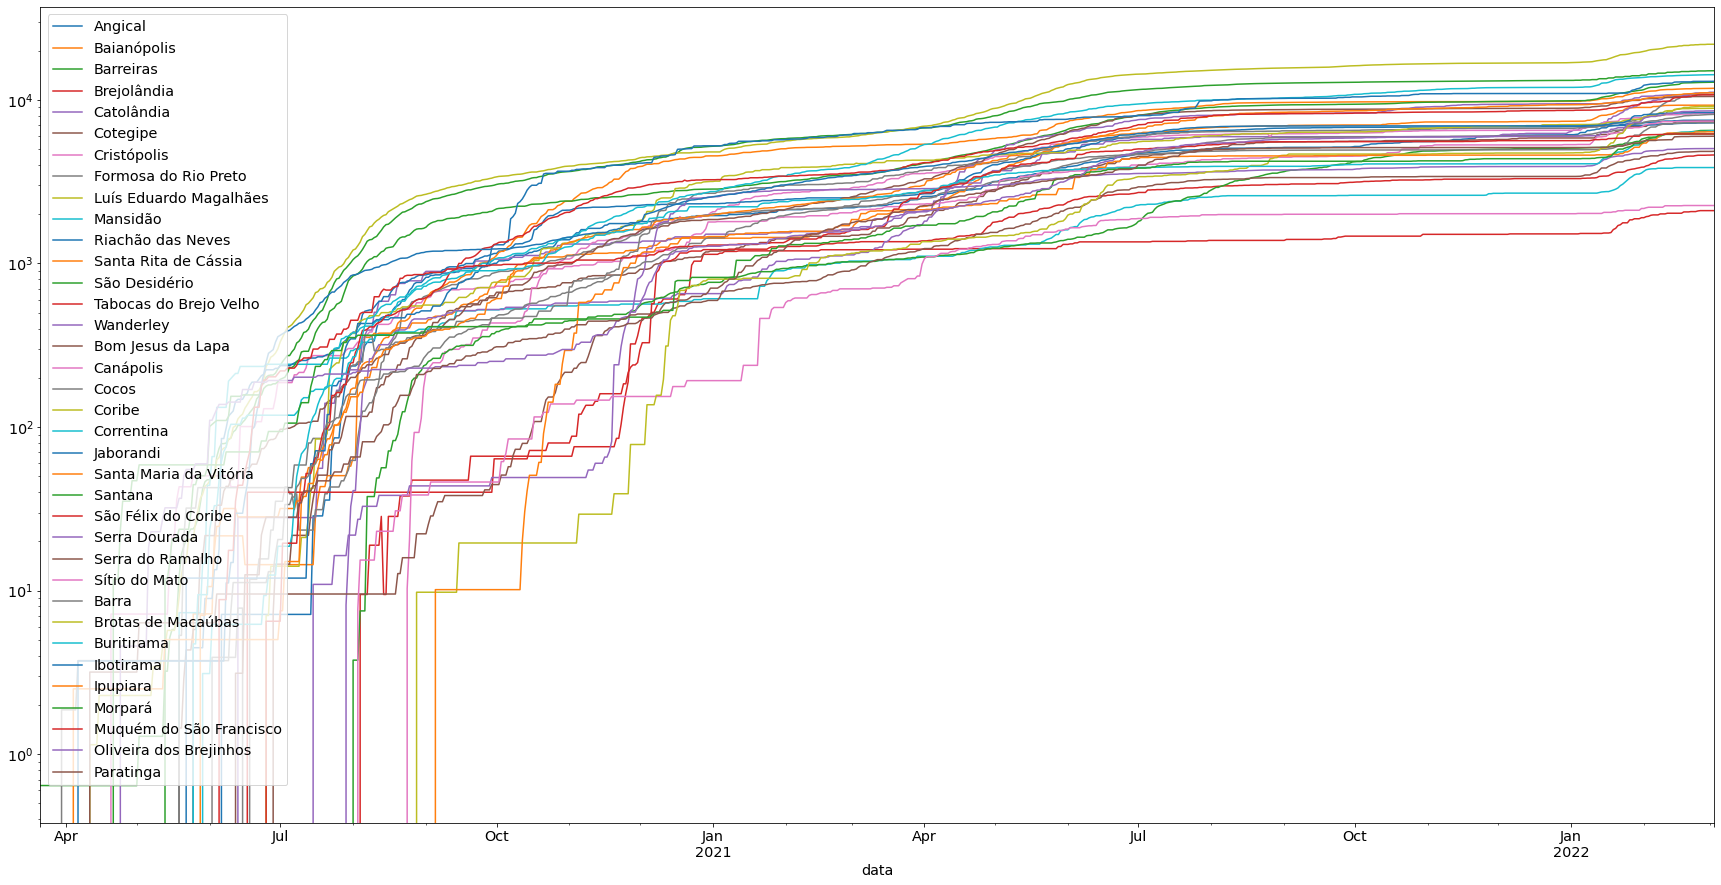

In [ ]:
casos_ac_relativos.plot(figsize=(30,15), logy=True)

### Cria dataframe com casos novos semanais relativos para todas as cidades da Macrorregião

In [ ]:
# Cria dataframe para casos novos semanais relativos onde divide-se o número de casos novos semanais pela população e multiplica por 100k (padrão)
casos_nv_sem_relativos = casos_nv_sem.set_index('data')[cidades_por_micro].copy()
for i in range(len(cidades_por_micro)):
  casos_nv_sem_relativos[cidades_por_micro[i]] = (casos_nv_sem_relativos[cidades_por_micro[i]]/df_cid_pop.populacao[i])*100000

In [ ]:
casos_nv_sem_relativos

Angical  Baianópolis   Barreiras  Brejolândia  Catolândia  \
data                                                                      
2020-03-21   0.000000     0.000000    0.000000     0.000000    0.000000   
2020-03-22   0.000000     0.000000    0.000000     0.000000    0.000000   
2020-03-23   0.000000     0.000000    0.000000     0.000000    0.000000   
2020-03-24   0.000000     0.000000    0.000000     0.000000    0.000000   
2020-03-25   0.000000     0.000000    0.000000     0.000000    0.000000   
...               ...          ...         ...          ...         ...   
2022-02-27  85.855334    28.824674  281.782564    75.779104  615.040537   
2022-02-28  57.236889    14.412337  257.979014    75.779104  587.084149   
2022-03-01  57.236889    14.412337  257.979014    75.779104  642.996925   
2022-03-02  35.773056     0.000000  257.979014    75.779104  642.996925   
2022-03-03  28.618445     0.000000  169.841546    75.779104  587.084149   

              Cotegipe  Cristópolis  Formosa do Rio Preto  \
data                                                        
2020-03-21    0.000000     0.000000              0.000000   
2020-03-22    0.000000     0.000000              0.000000   
2020-03-23    0.000000     0.000000              0.000000   
2020-03-24    0.000000     0.000000              0.000000   
2020-03-25    0.000000     0.000000              0.000000   
...                ...          ...                   ...   
2022-02-27  268.466115   150.970525            394.670001   
2022-02-28  130.605137   150.970525            339.963268   
2022-03-01   50.790887   165.348670            304.794654   
2022-03-02   50.790887   150.970525            277.441288   
2022-03-03   21.767523    93.457944            246.180298   

            Luís Eduardo Magalhães   Mansidão  ...  Sítio do Mato       Barra  \
data                                           ...                              
2020-03-21                0.000000   0.000000  ...       0.000000    0.000000   
2020-03-22                0.000000   0.000000  ...       0.000000    0.000000   
2020-03-23                0.000000   0.000000  ...       0.000000    0.000000   
2020-03-24                0.000000   0.000000  ...       0.000000    0.000000   
2020-03-25                0.000000   0.000000  ...       0.000000    0.000000   
...                            ...        ...  ...            ...         ...   
2022-02-27              714.130646  36.648831  ...       7.685214  104.520512   
2022-02-28              674.139330   7.329766  ...       7.685214   89.589010   
2022-03-01              674.139330   0.000000  ...       7.685214   76.523946   
2022-03-02              502.747975   0.000000  ...       7.685214   61.592445   
2022-03-03              502.747975   0.000000  ...       7.685214   39.195192   

            Brotas de Macaúbas  Buritirama  Ibotirama    Ipupiara    Morpará  \
data                                                                           
2020-03-21            0.000000    0.000000   0.000000    0.000000   0.000000   
2020-03-22            0.000000    0.000000   0.000000    0.000000   0.000000   
2020-03-23            0.000000    0.000000   0.000000    0.000000   0.000000   
2020-03-24            0.000000    0.000000   0.000000    0.000000   0.000000   
2020-03-25            0.000000    0.000000   0.000000    0.000000   0.000000   
...                        ...         ...        ...         ...        ...   
2022-02-27          273.678037  207.802021  85.416125  101.368474  35.215401   
2022-02-28          215.032744  179.465382  66.847402  111.505322  11.738467   
2022-03-01          117.290587  155.851516  66.847402  111.505322  11.738467   
2022-03-02          107.516372  155.851516  51.992424  111.505322  11.738467   
2022-03-03           58.645294  146.405970  51.992424  111.505322  11.738467   

            Muquém do São Francisco  Oliveira dos Brejinhos  Paratinga  
data                                                                    
202

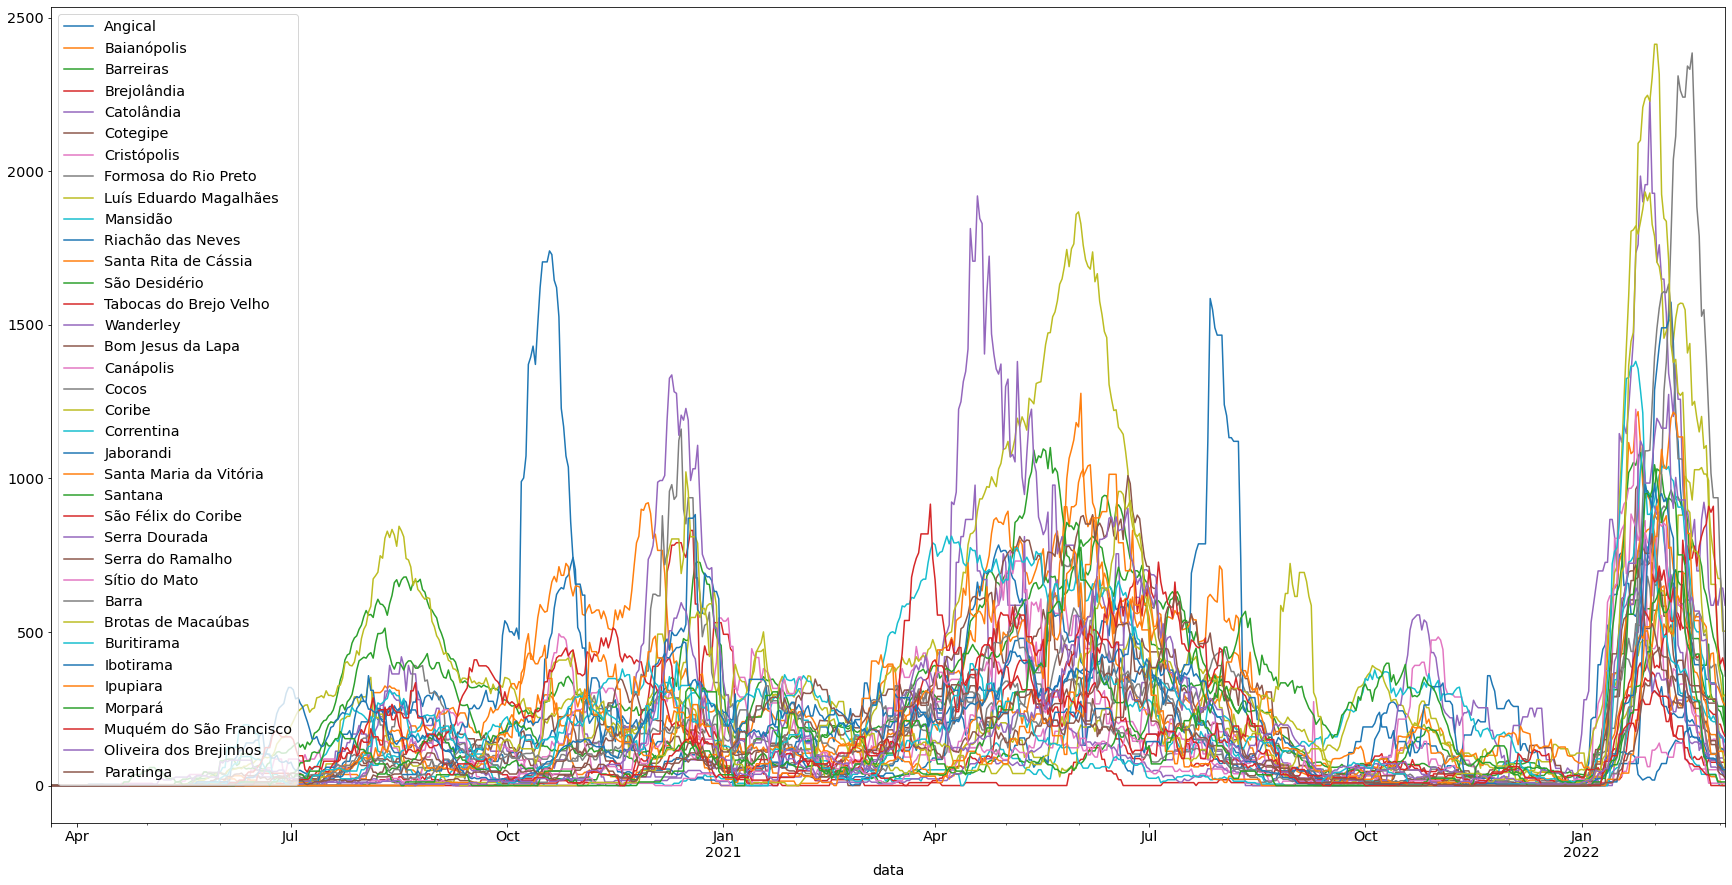

In [ ]:
casos_nv_sem_relativos.plot(figsize=(30,15))

## Cria dataframe com os casos acumulados da macrorregião e da Bahia

### Download e tratamento do arquivo de dados da Secretaria Estadual de Saúde do Estado da Bahia

In [ ]:
# Download do arquivo de dados diretamente do site da Secretaria Estadual de Saúde do Estado da Bahia
#url= 'https://ftp.sei.ba.gov.br/covid19/serie_casos_covid19_BA.csv'
#df_bahia = pd.read_csv(url, sep=';')
#df_bahia

In [ ]:
# Backup do arquivo de dados do SEI
#df_bahia.to_csv(r'/content/drive/MyDrive/Colab Notebooks/gt_dados/serie_casos_covid19_BA.csv')

In [ ]:
# Alternativa caso o site estiver down
df_bahia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gt_dados/serie_casos_covid19_BA.csv', sep=',')
df_bahia = df_bahia.drop(columns='Unnamed: 0').copy() # remove coluna com indices
df_bahia

date    casos  casos_novos
0    06/03/2020        1            1
1    07/03/2020        2            1
2    08/03/2020        2            0
3    09/03/2020        2            0
4    10/03/2020        2            0
..          ...      ...          ...
685  21/01/2022  1308146         5101
686  22/01/2022  1312371         4225
687  23/01/2022  1316452         4081
688  24/01/2022  1319176         2724
689  25/01/2022  1325321         6145

[690 rows x 3 columns]

In [ ]:
#casos_ac_bahia = df_bahia.set_index('date').copy()
casos_ac_bahia = df_bahia.copy()
casos_ac_bahia

date    casos  casos_novos
0    06/03/2020        1            1
1    07/03/2020        2            1
2    08/03/2020        2            0
3    09/03/2020        2            0
4    10/03/2020        2            0
..          ...      ...          ...
685  21/01/2022  1308146         5101
686  22/01/2022  1312371         4225
687  23/01/2022  1316452         4081
688  24/01/2022  1319176         2724
689  25/01/2022  1325321         6145

[690 rows x 3 columns]

In [ ]:
casos_ac_bahia.date = pd.to_datetime(casos_ac_bahia.date, format='%d/%m/%Y') # converte coluna de datas para o formato datetime
casos_ac_bahia

date    casos  casos_novos
0   2020-03-06        1            1
1   2020-03-07        2            1
2   2020-03-08        2            0
3   2020-03-09        2            0
4   2020-03-10        2            0
..         ...      ...          ...
685 2022-01-21  1308146         5101
686 2022-01-22  1312371         4225
687 2022-01-23  1316452         4081
688 2022-01-24  1319176         2724
689 2022-01-25  1325321         6145

[690 rows x 3 columns]

In [ ]:
casos_ac_bahia = casos_ac_bahia.drop(columns='casos_novos').copy() # remove coluna de casos novos
casos_ac_bahia = casos_ac_bahia.rename(columns={'date':'data', 'casos':'Bahia'}).copy() # renomeia colunas

In [ ]:
casos_ac_bahia

data    Bahia
0   2020-03-06        1
1   2020-03-07        2
2   2020-03-08        2
3   2020-03-09        2
4   2020-03-10        2
..         ...      ...
685 2022-01-21  1308146
686 2022-01-22  1312371
687 2022-01-23  1316452
688 2022-01-24  1319176
689 2022-01-25  1325321

[690 rows x 2 columns]

In [ ]:
datas_casos

DatetimeIndex(['2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30',
               ...
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
               '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01',
               '2022-03-02', '2022-03-03'],
              dtype='datetime64[ns]', length=713, freq='D')

In [ ]:
temp_casos_ac_bahia = casos_ac_bahia[(casos_ac_bahia.data >= datas_casos.format()[0]) & (casos_ac_bahia.data <= datas_casos.format()[-1])] # cria dataframe com o período considerado
temp_casos_ac_bahia.set_index('data', inplace=True) # coloca a data como índice
temp_casos_ac_bahia

Bahia
data               
2020-03-21       41
2020-03-22       55
2020-03-23       63
2020-03-24       79
2020-03-25       91
...             ...
2022-01-21  1308146
2022-01-22  1312371
2022-01-23  1316452
2022-01-24  1319176
2022-01-25  1325321

[675 rows x 1 columns]

### Criação de dataframe concatenando os casos acumulados do estado da Bahia com e da Macrorregião

In [ ]:
temp_casos_ac_macro = casos_ac_macro.rename(columns={'casos':'Macrorregião'}).copy()
temp_casos_ac_macro

Macrorregião
data                    
2020-03-21             1
2020-03-22             1
2020-03-23             1
2020-03-24             1
2020-03-25             1
...                  ...
2022-02-27        102798
2022-02-28        102914
2022-03-01        102934
2022-03-02        102960
2022-03-03        103026

[713 rows x 1 columns]

In [ ]:
casos_ac_bahia_macro = pd.concat([temp_casos_ac_bahia, temp_casos_ac_macro], axis=1) # concatena os dataframes separados
casos_ac_bahia_macro

Bahia  Macrorregião
data                           
2020-03-21   41.0             1
2020-03-22   55.0             1
2020-03-23   63.0             1
2020-03-24   79.0             1
2020-03-25   91.0             1
...           ...           ...
2022-02-27    NaN        102798
2022-02-28    NaN        102914
2022-03-01    NaN        102934
2022-03-02    NaN        102960
2022-03-03    NaN        103026

[713 rows x 2 columns]

In [ ]:
#salva_df(casos_ac_bahia_macro, 'serie_casos_acumulados_bahia_macro')

In [ ]:
#pop_bahia_macro = pd.DataFrame({'bahia': [14021432], 'macrorregiao': [953520]}) # Censo IBGE 2010
#pop_bahia_macro = pd.DataFrame({'Bahia': [14930634], 'Macrorregião': [953520]}) # Censo IBGE 2020
pop_bahia_macro = pd.DataFrame({'Bahia': [14873064], 'Macrorregião': [953520]}) # Boletim Epidemiológico SESAB
pop_bahia_macro

Bahia  Macrorregião
0  14873064        953520

In [ ]:
casos_ac_bahia_macro_relativos = casos_ac_bahia_macro.copy()
for col, pop in zip(casos_ac_bahia_macro.columns, pop_bahia_macro.columns):
  casos_ac_bahia_macro_relativos[col] = (casos_ac_bahia_macro[col]/pop_bahia_macro[pop][0])*100000

In [ ]:
casos_ac_bahia_macro_relativos

Bahia  Macrorregião
data                              
2020-03-21  0.275666      0.104875
2020-03-22  0.369796      0.104875
2020-03-23  0.423585      0.104875
2020-03-24  0.531162      0.104875
2020-03-25  0.611844      0.104875
...              ...           ...
2022-02-27       NaN  10780.896048
2022-02-28       NaN  10793.061498
2022-03-01       NaN  10795.158990
2022-03-02       NaN  10797.885729
2022-03-03       NaN  10804.807450

[713 rows x 2 columns]

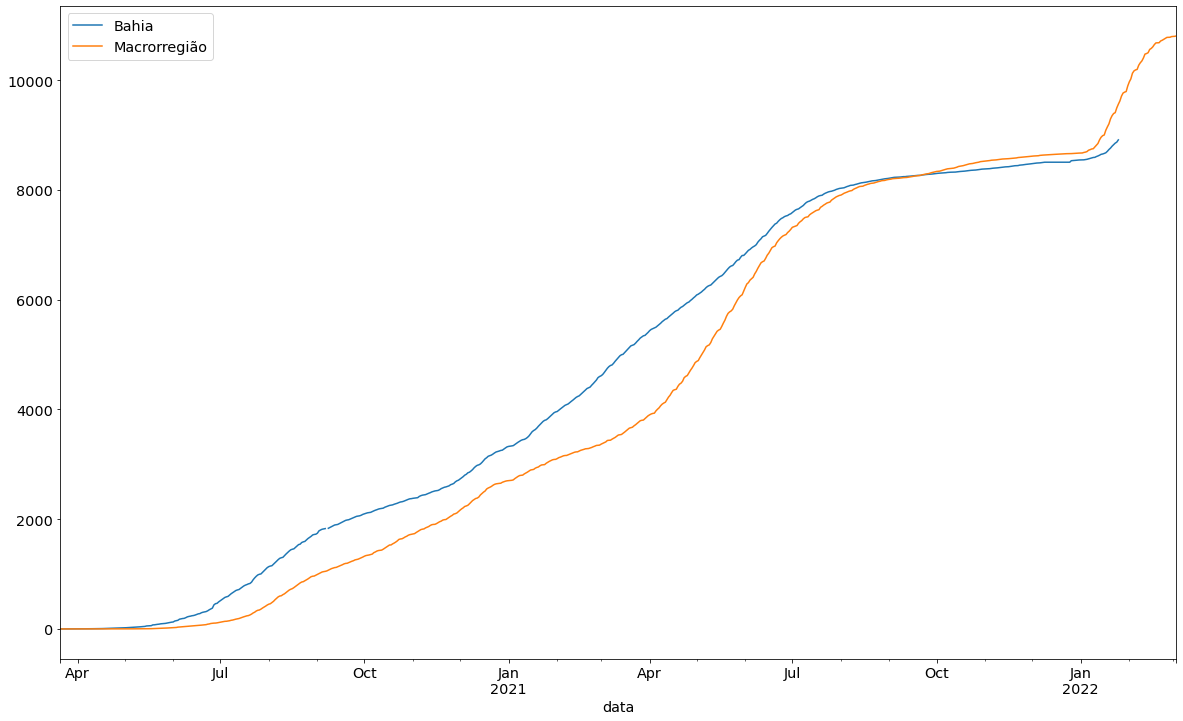

In [ ]:
casos_ac_bahia_macro_relativos.plot(figsize=(20,12), logy=False)

### Cria dataframe com casos novos semanais relativos da Bahia e Macrorregião

In [ ]:
estado_macro =  ['Bahia', 'Macrorregião']

In [ ]:
periodo = 14 #casos novos em duas semanas
casos_nv_sem_bahia_macro = cria_dataframe_periodo(datas_casos, estado_macro, casos_ac_bahia_macro.reset_index(), periodo)

In [ ]:
casos_nv_sem_bahia_macro

data  Bahia  Macrorregião
0   2020-03-21      0             0
1   2020-03-22      0             0
2   2020-03-23      0             0
3   2020-03-24      0             0
4   2020-03-25      0             0
..         ...    ...           ...
708 2022-02-27      0          2687
709 2022-02-28      0          2238
710 2022-03-01      0          2077
711 2022-03-02      0          1828
712 2022-03-03      0          1496

[713 rows x 3 columns]

In [ ]:
casos_nv_sem_bahia_macro_relativos = casos_nv_sem_bahia_macro.copy()

In [ ]:
for col, pop in zip(casos_ac_bahia_macro.columns, pop_bahia_macro.columns):
  casos_nv_sem_bahia_macro_relativos[col] = (casos_nv_sem_bahia_macro[col]/pop_bahia_macro[pop][0])*100000

### Cria dataframe ordenando as cidades com maiores coeficientes de incidência acumulados

In [ ]:
# Plotar apenas os gráficos dos cinco maiores coeficientes
casos_ac_relativos.iloc[-1:,:]

Angical  Baianópolis     Barreiras  Brejolândia    Catolândia  \
data                                                                            
2022-03-03  7512.341704  9274.338834  15062.500402  2102.870134  11126.642438   

              Cotegipe  Cristópolis  Formosa do Rio Preto  \
data                                                        
2022-03-03  7393.70193  8274.622574           8155.210816   

            Luís Eduardo Magalhães     Mansidão  ...  Sítio do Mato  \
data                                             ...                  
2022-03-03            21864.966464  3855.457011  ...    2259.452813   

                  Barra  Brotas de Macaúbas   Buritirama    Ibotirama  \
data                                                                    
2022-03-03  7258.576281         8894.536213  6479.644847  8367.066513   

              Ipupiara      Morpará  Muquém do São Francisco  \
data                                                           
2022-03-03  6376.07704  6186.172086               6186.11209   

            Oliveira dos Brejinhos  Paratinga  
data                                           
2022-03-03             8568.155785    5993.75  

[1 rows x 36 columns]

In [ ]:
# Cria um dataframe ordenando as colunas das cidades do maior para o menor coeficiente de incidência na data final 
cid_maiores_coef_inc = casos_ac_relativos.sort_values(by=datas_casos[-1], axis=1, ascending=False).copy()

In [ ]:
cid_maiores_coef_inc.columns[0:5]

Index(['Luís Eduardo Magalhães', 'Barreiras', 'Correntina', 'Jaborandi',
       'São Desidério'],
      dtype='object')

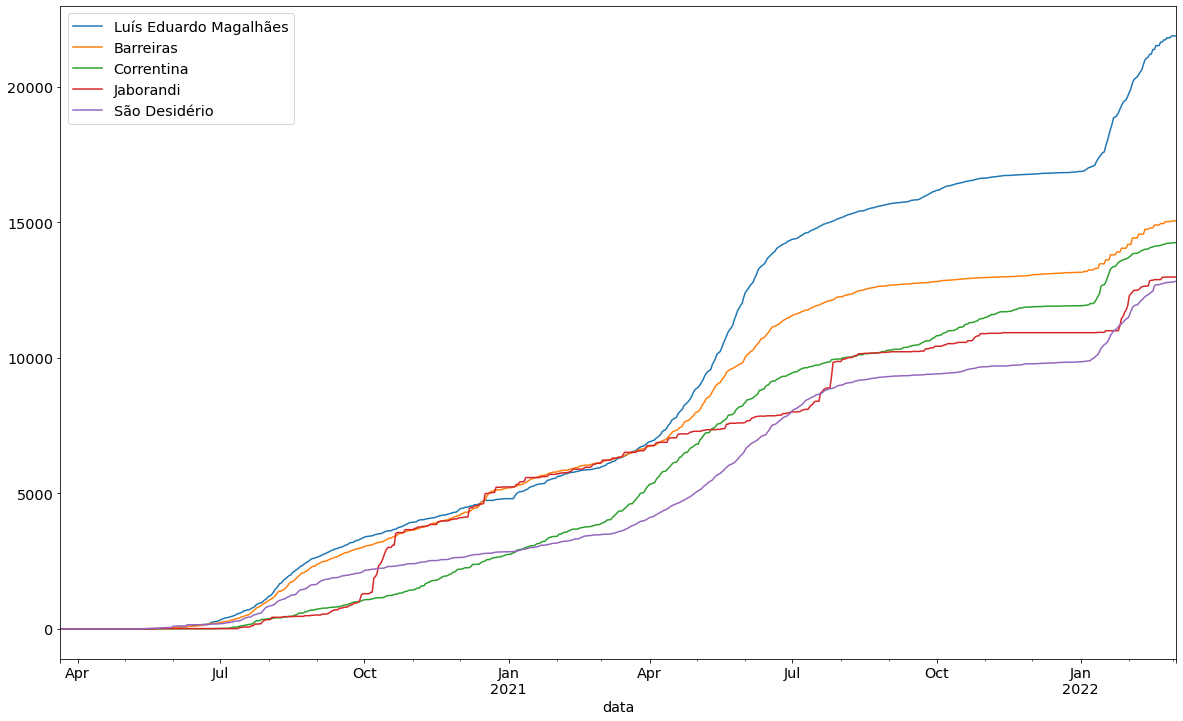

In [ ]:
cid_maiores_coef_inc.iloc[:,0:5].plot(figsize=(20,12), logy=False)

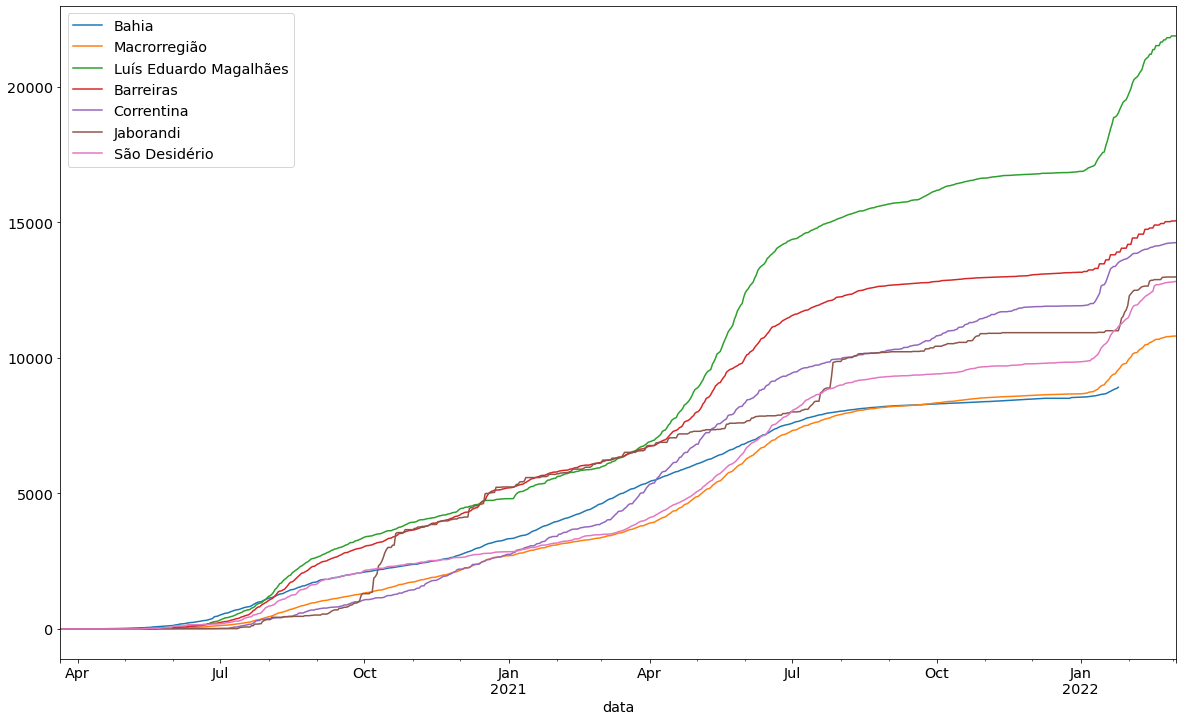

In [ ]:
ax = plt.gca()
casos_ac_bahia_macro_relativos.reset_index().plot(figsize=(20,12), x='data', ax=ax, logy=False)
cid_maiores_coef_inc.iloc[:,0:5].reset_index().plot(figsize=(20,12), x='data', ax=ax, logy=False)

### Cria dataframe ordenado com as cidades de maiores coeficientes de incidência semanais

In [ ]:
# Mostrar os coeficientes de incidência de duas semanas do último dia
casos_nv_sem_relativos.iloc[-1:,:]

Angical  Baianópolis   Barreiras  Brejolândia  Catolândia  \
data                                                                      
2022-03-03  28.618445          0.0  169.841546    75.779104  587.084149   

             Cotegipe  Cristópolis  Formosa do Rio Preto  \
data                                                       
2022-03-03  21.767523    93.457944            246.180298   

            Luís Eduardo Magalhães  Mansidão  ...  Sítio do Mato      Barra  \
data                                          ...                             
2022-03-03              502.747975       0.0  ...       7.685214  39.195192   

            Brotas de Macaúbas  Buritirama  Ibotirama    Ipupiara    Morpará  \
data                                                                           
2022-03-03           58.645294   146.40597  51.992424  111.505322  11.738467   

            Muquém do São Francisco  Oliveira dos Brejinhos  Paratinga  
data                                                                    
2022-03-03                      0.0              100.801833       25.0  

[1 rows x 36 columns]

In [ ]:
# Cria um dataframe ordenando as colunas das cidades do maior para o menor coeficiente de incidência de duas semanas na data final 
cid_maiores_coef_inc_sem = casos_nv_sem_relativos.sort_values(by=datas_casos[-1], axis=1, ascending=False).copy()

In [ ]:
cid_maiores_coef_inc_sem.columns[0:5]

Index(['Catolândia', 'Luís Eduardo Magalhães', 'São Félix do Coribe', 'Cocos',
       'Coribe'],
      dtype='object')

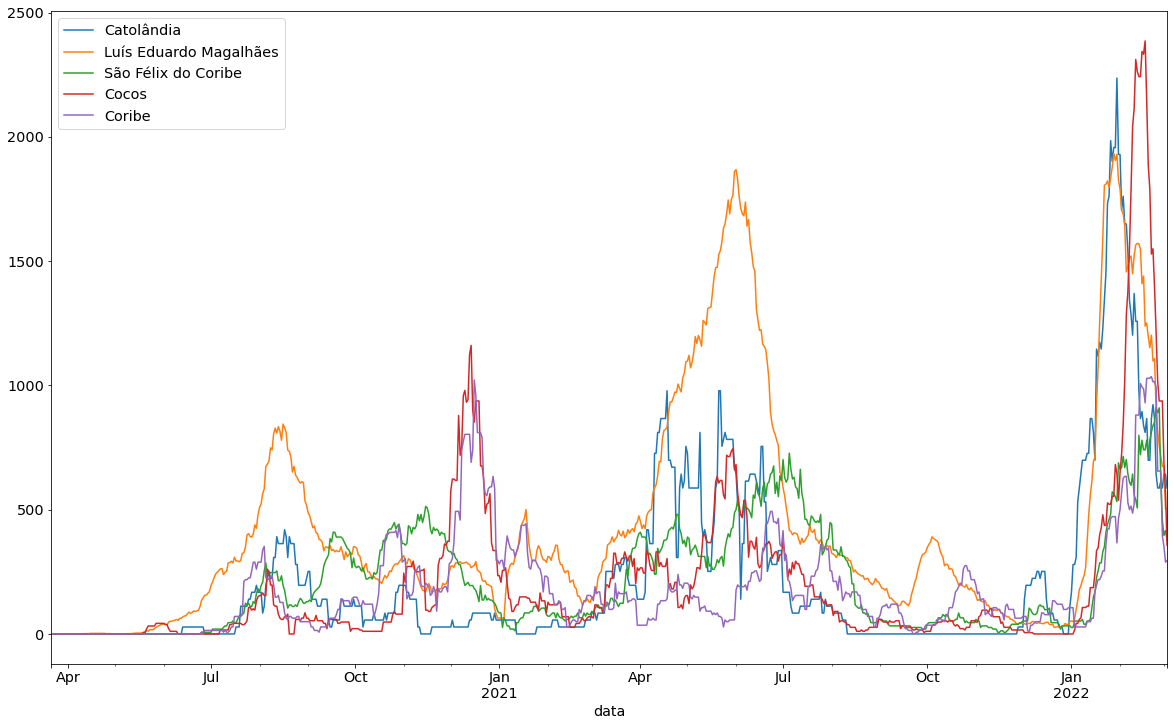

In [ ]:
cid_maiores_coef_inc_sem.iloc[:,0:5].plot(figsize=(20,12), logy=False)

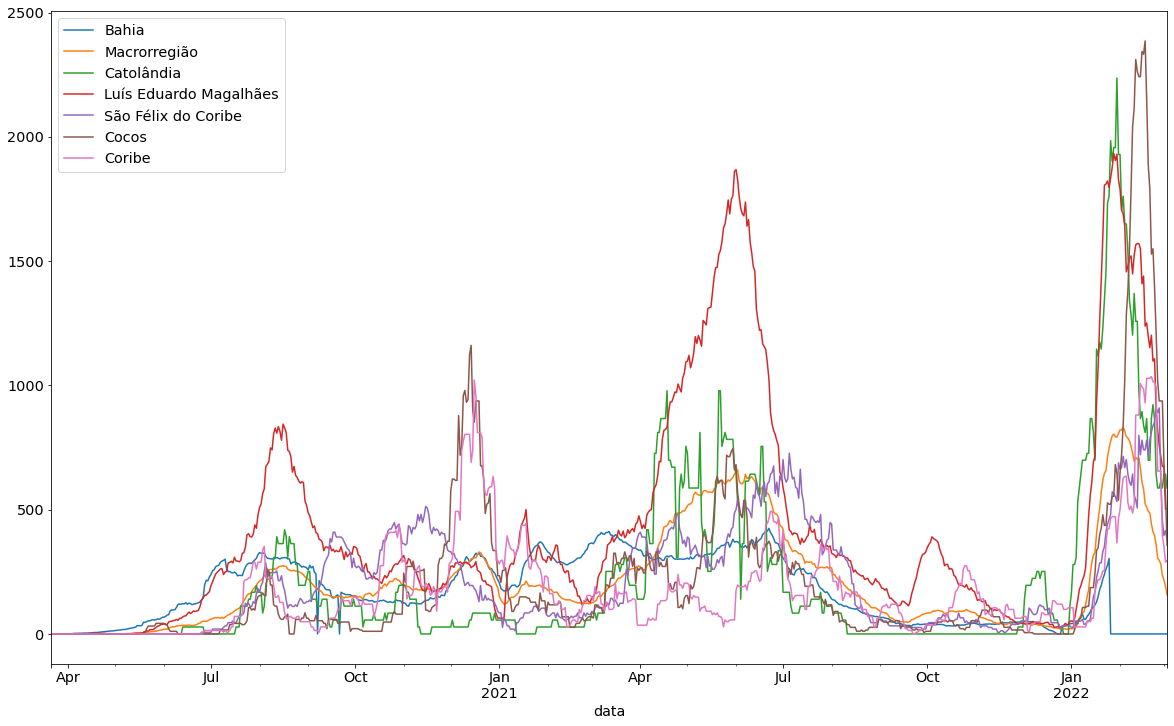

In [ ]:
ax = plt.gca()
casos_nv_sem_bahia_macro_relativos.plot(figsize=(20,12), x='data', ax=ax, logy=False)
cid_maiores_coef_inc_sem.iloc[:,0:5].reset_index().plot(figsize=(20,12), x='data', ax=ax, logy=False)

# Grava planilha com dados da macrorregião e municípios

In [ ]:
df_rel_nv.groupby('data').agg({'casos_novos': 'sum'}).reset_index().tail(14).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


casos_novos    1496
dtype: int64

In [ ]:
df_rel_nv.groupby('data').agg({'casos_novos': 'sum'}).reset_index().tail(15)

data  casos_novos
698 2022-02-17          398
699 2022-02-18          284
700 2022-02-19           18
701 2022-02-20           15
702 2022-02-21          302
703 2022-02-22          124
704 2022-02-23          168
705 2022-02-24          180
706 2022-02-25          150
707 2022-02-26           20
708 2022-02-27            7
709 2022-02-28          116
710 2022-03-01           20
711 2022-03-02           26
712 2022-03-03           66

In [ ]:
df_rel_ac.groupby('data').agg({'casos':'sum'}).tail(15)

casos
data              
2022-02-17  101530
2022-02-18  101814
2022-02-19  101832
2022-02-20  101847
2022-02-21  102149
2022-02-22  102273
2022-02-23  102441
2022-02-24  102621
2022-02-25  102771
2022-02-26  102791
2022-02-27  102798
2022-02-28  102914
2022-03-01  102934
2022-03-02  102960
2022-03-03  103026

In [ ]:
df_rel_ob_nv.groupby('data').agg({'obitos_novos': 'sum'}).reset_index()

data  obitos_novos
0   2020-05-10             0
1   2020-05-11             0
2   2020-05-12             0
3   2020-05-13             1
4   2020-05-14             0
..         ...           ...
658 2022-02-27             0
659 2022-02-28             0
660 2022-03-01             1
661 2022-03-02             0
662 2022-03-03             2

[663 rows x 2 columns]

In [ ]:
# Dataframe concatenando a incidência de casos novos semanais e acumulados da macrorregião
df_macro_incid_novos_sem = casos_nv_sem_bahia_macro_relativos[['data', 'Macrorregião']].rename(columns={'Macrorregião':'incid_novos_2sem'}).set_index('data')
df_macro_incid_acumulados = casos_ac_bahia_macro_relativos[['Macrorregião']].rename(columns={'Macrorregião':'incid_acumulados'})
df_incid_macro = pd.concat([np.round(df_macro_incid_novos_sem, 2), np.round(df_macro_incid_acumulados, 2)], axis=1)
df_incid_macro.index = df_incid_macro.index.strftime("%Y-%m-%d")

In [ ]:
# Dataframe concatemando a incidência de casos novos semanais e acumulados das 36 cidades da macrorregião
df_incid_novos_sem = cria_dataframe_relacional(datas_casos, cidades, casos_nv_sem_relativos[cidades]
                                               .reset_index(), 'incid_novos_2sem' )
df_incid_acumulados = cria_dataframe_relacional(datas_casos, cidades, casos_ac_relativos[cidades].reset_index(), 'incid_acumulados')
df_incid_municipios = pd.concat([np.round(df_incid_novos_sem.set_index('data'), 2),
                                 np.round(df_incid_acumulados.set_index('data').drop(columns=['cidade']), 2)], axis=1)
#df_incid_municipios.index = df_incid_municipios.index.strftime("%Y-%m-%d")


In [ ]:
df_incid_municipios

cidade  incid_novos_2sem  incid_acumulados
data                                                                  
2020-03-21                 Angical              0.00              0.00
2020-03-21             Baianópolis              0.00              0.00
2020-03-21                   Barra              0.00              0.00
2020-03-21               Barreiras              0.00              0.64
2020-03-21       Bom Jesus da Lapa              0.00              0.00
...                            ...               ...               ...
2022-03-03        Serra do Ramalho             60.37           4851.93
2022-03-03           Serra Dourada             32.75           5038.21
2022-03-03           Sítio do Mato              7.69           2259.45
2022-03-03  Tabocas do Brejo Velho            159.77           4601.37
2022-03-03               Wanderley             81.71          10810.59

[25668 rows x 3 columns]

In [ ]:
df_rel_nv.groupby('data').agg({'casos_novos': 'sum'}).reset_index()

data  casos_novos
0   2020-03-21            0
1   2020-03-22            0
2   2020-03-23            0
3   2020-03-24            0
4   2020-03-25            0
..         ...          ...
708 2022-02-27            7
709 2022-02-28          116
710 2022-03-01           20
711 2022-03-02           26
712 2022-03-03           66

[713 rows x 2 columns]

In [ ]:
def cria_dataframes_media_movel_variac_percent_macrorreg_cidades(df_rel_nv, df_rel_ob_nv, df_rel_nv_sem, df_rel_ob_nv_sem, df_rel_casos, df_rel_obitos):

  casos = df_rel_nv.groupby('data').agg({'casos_novos': 'sum'}).reset_index().copy()
  casos['media_movel_casos'] = casos.rolling(7).mean() # acrescenta coluna ao dataframe com média móvel
  casos = casos.round({'media_movel_casos': 0}).fillna(0).copy()
  casos['media_movel_casos'] = casos['media_movel_casos'].astype(int)
  casos['var_%_14dias_casos'] = round( (casos.media_movel_casos - casos.media_movel_casos.shift(13)) / casos.media_movel_casos.shift(13) * 100, 1)
  casos['casos_novos_2sem'] = df_rel_nv_sem.groupby('data').agg({'casos_novos_2sem': 'sum'}).reset_index()['casos_novos_2sem']
  casos['casos_novos_2sem'] = casos['casos_novos_2sem'].fillna(0).astype(int)
  obitos = df_rel_ob_nv.groupby('data').agg({'obitos_novos': 'sum'}).reset_index().copy()
  obitos['media_movel_obitos'] = obitos.rolling(7).mean()
  obitos = obitos.round({'media_movel_obitos': 0}).fillna(0).copy()
  obitos['media_movel_obitos'] = obitos['media_movel_obitos'].astype(int)
  obitos['var_%_14dias_obitos'] = round( (obitos.media_movel_obitos - obitos.media_movel_obitos.shift(13)) / obitos.media_movel_obitos.shift(13) * 100, 1)
  obitos['obitos_novos_2sem'] = df_rel_ob_nv_sem.groupby('data').agg({'obitos_novos_2sem': 'sum'}).reset_index()['obitos_novos_2sem']
  obitos['obitos_novos_2sem'] = obitos['obitos_novos_2sem'].fillna(0).astype(int)

  df_macro = pd.concat([casos.set_index('data'),obitos.set_index('data')], axis=1)
  df_macro.index = df_macro.index.strftime("%Y-%m-%d")
  df_macro['obitos_novos'] = df_macro['obitos_novos'].fillna(0).astype(int)
  df_macro['media_movel_obitos'] = df_macro['media_movel_obitos'].fillna(0).astype(int)
  df_macro['obitos_novos_2sem'] = df_macro['obitos_novos_2sem'].fillna(0).astype(int)


  casos = df_rel_casos.copy()
  df_rel_temp_casos = df_rel_nv_sem.copy()
  df_rel_temp_casos.set_index('data', inplace=True)
  df_rel_temp_casos['%2sem_da_macro'] = round( df_rel_nv_sem.set_index('data')[['casos_novos_2sem']]/df_rel_nv_sem.groupby(['data']).sum()*100, 2)
  casos = pd.concat([casos,
                     df_rel_temp_casos[['casos_novos_2sem', '%2sem_da_macro']],
                     df_incid_municipios[['incid_novos_2sem', 'incid_acumulados']]
                     ], axis=1)

  casos.index = casos.index.strftime("%Y-%m-%d")
  
  obitos = df_rel_obitos.copy()
  df_rel_temp_obitos = df_rel_ob_nv_sem.copy()
  df_rel_temp_obitos.set_index('data', inplace=True)
  df_rel_temp_obitos['%2sem_da_macro'] = round( df_rel_ob_nv_sem.set_index('data')[['obitos_novos_2sem']]/df_rel_ob_nv_sem.groupby(['data']).sum()*100, 2)
  obitos = pd.concat([obitos, df_rel_temp_obitos[['obitos_novos_2sem', '%2sem_da_macro']]], axis=1)

  obitos.index = obitos.index.strftime("%Y-%m-%d")

  return df_macro, casos, obitos


In [ ]:
exibe_arq = cria_dataframes_media_movel_variac_percent_macrorreg_cidades(df_rel_nv,
                                                                         df_rel_ob_nv,
                                                                         df_rel_nv_sem,
                                                                         df_rel_ob_nv_sem,
                                                                         df_rel_casos,
                                                                         df_rel_obitos)

In [ ]:
exibe_arq[0]

casos_novos  media_movel_casos  var_%_14dias_casos  \
data                                                             
2020-03-21            0                  0                 NaN   
2020-03-22            0                  0                 NaN   
2020-03-23            0                  0                 NaN   
2020-03-24            0                  0                 NaN   
2020-03-25            0                  0                 NaN   
...                 ...                ...                 ...   
2022-02-27            7                136               -65.3   
2022-02-28          116                109               -69.5   
2022-03-01           20                 94               -73.3   
2022-03-02           26                 74               -77.9   
2022-03-03           66                 58               -79.1   

            casos_novos_2sem  obitos_novos  media_movel_obitos  \
data                                                             
2020-03-21                 0             0                   0   
2020-03-22                 0             0                   0   
2020-03-23                 0             0                   0   
2020-03-24                 0             0                   0   
2020-03-25                 0             0                   0   
...                      ...           ...                 ...   
2022-02-27              2687             0                   0   
2022-02-28              2238             0                   0   
2022-03-01              2077             1                   0   
2022-03-02              1828             0                   0   
2022-03-03              1496             2                   0   

            var_%_14dias_obitos  obitos_novos_2sem  
data                                                
2020-03-21                  NaN                  0  
2020-03-22                  NaN                  0  
2020-03-23                  NaN                  0  
2020-03-24                  NaN                  0  
2020-03-25                  NaN                  0  
...                         ...                ...  
2022-02-27               -100.0                 10  
2022-02-28               -100.0                  6  
2022-03-01               -100.0                  6  
2022-03-02               -100.0                  6  
2022-03-03               -100.0                  6  

[713 rows x 8 columns]

In [ ]:
exibe_arq[1]

cidade  casos  casos_novos  media_movel_casos  \
data                                                                        
2020-03-21                 Angical      0            0                  0   
2020-03-21             Baianópolis      0            0                  0   
2020-03-21                   Barra      0            0                  0   
2020-03-21               Barreiras      1            0                  0   
2020-03-21       Bom Jesus da Lapa      0            0                  0   
...                            ...    ...          ...                ...   
2022-03-03        Serra do Ramalho   1527            4                  1   
2022-03-03           Serra Dourada    923            0                  0   
2022-03-03           Sítio do Mato    294            0                  0   
2022-03-03  Tabocas do Brejo Velho    576            0                  0   
2022-03-03               Wanderley   1323            0                  0   

            var_%_14dias_casos  casos_novos_2sem  %2sem_da_macro  \
data                                                               
2020-03-21                 0.0                 0             NaN   
2020-03-21                 0.0                 0             NaN   
2020-03-21                 0.0                 0             NaN   
2020-03-21                 0.0                 0             NaN   
2020-03-21                 0.0                 0             NaN   
...                        ...               ...             ...   
2022-03-03               -75.0                19            1.27   
2022-03-03              -100.0                 6            0.40   
2022-03-03                 0.0                 1            0.07   
2022-03-03              -100.0                20            1.34   
2022-03-03                 0.0                10            0.67   

            incid_novos_2sem  incid_acumulados  
data                                            
2020-03-21              0.00              0.00  
2020-03-21              0.00              0.00  
2020-03-21              0.00              0.00  
2020-03-21              0.00              0.64  
2020-03-21              0.00              0.00  
...                      ...               ...  
2022-03-03             60.37           4851.93  
2022-03-03             32.75           5038.21  
2022-03-03              7.69           2259.45  
2022-03-03            159.77           4601.37  
2022-03-03             81.71          10810.59  

[25668 rows x 9 columns]

In [ ]:
exibe_arq[2]

cidade  obitos  obitos_novos  media_movel_obitos  \
data                                                                           
2020-05-10                 Angical       0             0                   0   
2020-05-10             Baianópolis       0             0                   0   
2020-05-10                   Barra       0             0                   0   
2020-05-10               Barreiras       0             0                   0   
2020-05-10       Bom Jesus da Lapa       0             0                   0   
...                            ...     ...           ...                 ...   
2022-03-03        Serra do Ramalho      43             1                   0   
2022-03-03           Serra Dourada      23             0                   0   
2022-03-03           Sítio do Mato      13             0                   0   
2022-03-03  Tabocas do Brejo Velho      13             0                   0   
2022-03-03               Wanderley      31             0                   0   

            var_%_14dias_obitos  obitos_novos_2sem  %2sem_da_macro  
data                                                                
2020-05-10                  0.0                  0             NaN  
2020-05-10                  0.0                  0             NaN  
2020-05-10                  0.0                  0             NaN  
2020-05-10                  0.0                  0             NaN  
2020-05-10                  0.0                  0             NaN  
...                         ...                ...             ...  
2022-03-03                  0.0                  1           16.67  
2022-03-03                  0.0                  2           33.33  
2022-03-03                  0.0                  0            0.00  
2022-03-03                  0.0                  1           16.67  
2022-03-03                  0.0                  0            0.00  

[23868 rows x 7 columns]

In [ ]:
import google.auth
from google.colab import auth
from gspread_pandas import Spread

auth.authenticate_user()
credentials, project_id = google.auth.default()

nome_planilha = 'dados_dashboard_covid19'

spread = Spread(nome_planilha, creds=credentials)
spread.df_to_sheet(exibe_arq[1], index=True, sheet='municípios casos', replace=True)
spread.df_to_sheet(exibe_arq[2], index=True, sheet='municípios óbitos', replace=True)
print(spread)

<gspread_pandas.spread.Spread - 'User: 'pedro.dias@ufob.edu.br', Spread: 'dados_dashboard_covid19', Sheet: 'municípios óbitos''>


# Ocupação média semanal de leitos

##Processamento dos dados

In [ ]:
df_leitos

0           1           2   \
0                         Unidade Hospitalar  2021-12-07  2021-12-08   
1                        HO (Clínicos Total)           5           5   
2                     HO (Clínicos Ocupados)           1           1   
3                             HO (UTI Total)          15          15   
4                          HO (UTI Ocupados)           3           3   
5                          ITIBA (UTI Total)          10          10   
6                       ITIBA (UTI Ocupados)           0           0   
7                      HMED (Clínicos Total)          43          43   
8                   HMED (Clínicos Ocupados)           0           1   
9          Hosp. Santa Rita (Clínicos Total)          10          10   
10      Hosp. Santa Rita (Clínicos Ocupados)           0           0   
11              Hosp. Santa Rita (UTI Total)          10          10   
12           Hosp. Santa Rita (UTI Ocupados)           1           1   
13      Hosp. Carmela Dutra (Clínicos Total)          19          19   
14   Hosp. Carmela Dutra (Clínicos Ocupados)           0           0   
15           Hosp. Carmela Dutra (UTI Total)          10          10   
16  Hosp. Carmela Dutra (UTI Total Ocupados)           1           1   

            3           4           5           6           7           8   \
0   2021-12-09  2021-12-10  2021-12-11  2021-12-12  2021-12-13  2021-12-14   
1            5           5           5           5           5           5   
2            2           2           2           2           0           1   
3           15          15          15          15          15          15   
4            5           3           3           3           3           2   
5           10          10          10          10          10          10   
6            0           0           0           0           0           0   
7           43          43          43          43          43          43   
8            0           0           0           0           0           0   
9           10          10          10          10          10          10   
10           1           1           1           0           0           0   
11          10          10          10          10          10          10   
12           0           0           0           0           0           0   
13          19          19          19          19          19          19   
14           0           0           0           0           1           1   
15          10          10          10          10          10          10   
16           2           2           2           2           3           3   

            9   ...          84          85          86          87  \
0   2021-12-15  ...  2022-02-28  2022-03-01  2022-03-02  2022-03-03   
1            5  ...           5           5           5           5   
2            1  ...           3           3           1           1   
3           15  ...          15          15          15          15   
4            2  ...           0           2           2           2   
5           10  ...           0           0           0           0   
6            0  ...           0           0           0           0   
7           43  ...          43          43          43          43   
8            0  ...           1           0           0           0   
9           10  ...          10          10          10          10   
10           0  ...           0           0           0           0   
11          10  ...          10          10          10          10   
12           0  ...           3           2           2           2   
13          19  ...          19          19          19          19   
14           1  ...           1           1           0           0   
15          10  ...          10          10          10          10   
16           3  ...           3           3           3           3   

            88          89          90          91          9

### Seleção e organização dos dados a partir da planilha

In [ ]:
data_final = casos_ac.data.iloc[-1].strftime("%Y-%m-%d")
data_final

'2022-03-03'

In [ ]:
# Data em que o Renan começou a lançar a série temporal de dados de ocupação de leitos
data_inicial = '2021-12-07'

In [ ]:
leitos_temp = df_leitos.iloc[1:17,:].copy()
leitos_temp.columns = df_leitos.iloc[0]
leitos_temp.reset_index().loc[:,data_inicial: data_final]

0  2021-12-07 2021-12-08 2021-12-09 2021-12-10 2021-12-11 2021-12-12  \
0           5          5          5          5          5          5   
1           1          1          2          2          2          2   
2          15         15         15         15         15         15   
3           3          3          5          3          3          3   
4          10         10         10         10         10         10   
5           0          0          0          0          0          0   
6          43         43         43         43         43         43   
7           0          1          0          0          0          0   
8          10         10         10         10         10         10   
9           0          0          1          1          1          0   
10         10         10         10         10         10         10   
11          1          1          0          0          0          0   
12         19         19         19         19         19         19   
13          0          0          0          0          0          0   
14         10         10         10         10         10         10   
15          1          1          2          2          2          2   

0  2021-12-13 2021-12-14 2021-12-15 2021-12-16  ... 2022-02-22 2022-02-23  \
0           5          5          5          5  ...          5          5   
1           0          1          1          1  ...          3          4   
2          15         15         15         15  ...         15         15   
3           3          2          2          2  ...          8          2   
4          10         10         10         10  ...          0          0   
5           0          0          0          0  ...          0          0   
6          43         43         43         43  ...         43         43   
7           0          0          0          0  ...          1          1   
8          10         10         10         10  ...         10         10   
9           0          0          0          0  ...          2          2   
10         10         10         10         10  ...         10         10   
11          0          0          0          0  ...          5          5   
12         19         19         19         19  ...         19         19   
13          1          1          1          1  ...          0          1   
14         10         10         10         10  ...         10         10   
15          3          3          3          3  ...          2          3   

0  2022-02-24 2022-02-25 2022-02-26 2022-02-27 2022-02-28 2022-03-01  \
0           5          5          5          5          5          5   
1           3          3          3          3          3          3   
2          15         15         15         15         15         15   
3           3          5          5          5          0          2   
4           0          0          0          0          0          0   
5           0          0          0          0          0          0   
6          43         43         43         43         43         43   
7           1          1          1          1          1          0   
8          10         10         10         10         10         10   
9           0          0          0          0          0          0   
10         10         10         10         10         10         10   
11          3          3          3          3          3          2   
12         19         19         19         19         19         19   
13          1          1          1          1          1          1   
14         10         10         10         10         10         10   
15          4          3          3          3          3          3   

0  2022-03-02 2022-03-03  
0           5          5  
1           1          1  
2          15         15  
3           2          2  
4           0          0  
5           0          0  
6          43         43  
7           0          0

In [ ]:
df_temp_leitos = leitos_temp.reset_index().loc[:, data_inicial : data_final]
for col in df_temp_leitos.columns:
  df_temp_leitos[col] = df_temp_leitos[col].str.replace('\.','').astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
HO_tot = (df_temp_leitos.iloc[0]+df_temp_leitos.iloc[2]).to_numpy()
HO_ocup = (df_temp_leitos.iloc[1] + df_temp_leitos.iloc[3]).to_numpy()
ITIBA_tot = (df_temp_leitos.iloc[4]).to_numpy()
ITIBA_ocup = (df_temp_leitos.iloc[5]).to_numpy()
HMED_tot = (df_temp_leitos.iloc[6]).to_numpy()
HMED_ocup = (df_temp_leitos.iloc[7]).to_numpy()
HSR_tot = (df_temp_leitos.iloc[8]+df_temp_leitos.iloc[10]).to_numpy()
HSR_ocup = (df_temp_leitos.iloc[9]+df_temp_leitos.iloc[11]).to_numpy()
HCD_tot = (df_temp_leitos.iloc[12]+df_temp_leitos.iloc[14]).to_numpy()
HCD_ocup = (df_temp_leitos.iloc[13]+df_temp_leitos.iloc[15]).to_numpy()

### Dataframe com cidades e regiões de saúde

In [ ]:
data = [
        ['Angical', 'Barreiras'],
        ['Baianópolis', 'Barreiras'],
        ['Barra', 'Ibotirama'],
        ['Barreiras', 'Barreiras'],
        ['Bom Jesus da Lapa', 'SaMaVi'],
        ['Brejolândia', 'Barreiras'],
        ['Brotas de Macaúbas', 'Ibotirama'],
        ['Buritirama', 'Ibotirama'],
        ['Canápolis', 'SaMaVi'],
        ['Catolândia', 'Barreiras'],
        ['Cocos', 'SaMaVi'],
        ['Coribe', 'SaMaVi'],
        ['Correntina', 'SaMaVi'],
        ['Cotegipe', 'Barreiras'],
        ['Cristópolis', 'Barreiras'],
        ['Formosa do Rio Preto', 'Barreiras'],
        ['Ibotirama', 'Ibotirama'],
        ['Ipupiara', 'Ibotirama'],
        ['Jaborandi', 'SaMaVi'],
        ['Luís Eduardo Magalhães', 'Barreiras'],
        ['Mansidão', 'Barreiras'],
        ['Morpará', 'Ibotirama'],
        ['Muquém do São Francisco', 'Ibotirama'],
        ['Oliveira dos Brejinhos', 'Ibotirama'],
        ['Paratinga', 'Ibotirama'],
        ['Riachão das Neves', 'Barreiras'],
        ['Santa Maria da Vitória', 'SaMaVi'],
        ['Santa Rita de Cássia', 'Barreiras'],
        ['Santana', 'SaMaVi'],
        ['São Desidério', 'Barreiras'],
        ['São Félix do Coribe', 'SaMaVi'],
        ['Serra do Ramalho', 'SaMaVi'],
        ['Serra Dourada', 'SaMaVi'],
        ['Sítio do Mato', 'SaMaVi'],
        ['Tabocas do Brejo Velho', 'Barreiras'],
        ['Wanderley', 'Barreiras']
        ]

df_cid_reg_saude =  pd.DataFrame(data, columns=['cidade', 'reg_saude'])
df_cid_reg_saude

cidade  reg_saude
0                   Angical  Barreiras
1               Baianópolis  Barreiras
2                     Barra  Ibotirama
3                 Barreiras  Barreiras
4         Bom Jesus da Lapa     SaMaVi
5               Brejolândia  Barreiras
6        Brotas de Macaúbas  Ibotirama
7                Buritirama  Ibotirama
8                 Canápolis     SaMaVi
9                Catolândia  Barreiras
10                    Cocos     SaMaVi
11                   Coribe     SaMaVi
12               Correntina     SaMaVi
13                 Cotegipe  Barreiras
14              Cristópolis  Barreiras
15     Formosa do Rio Preto  Barreiras
16                Ibotirama  Ibotirama
17                 Ipupiara  Ibotirama
18                Jaborandi     SaMaVi
19   Luís Eduardo Magalhães  Barreiras
20                 Mansidão  Barreiras
21                  Morpará  Ibotirama
22  Muquém do São Francisco  Ibotirama
23   Oliveira dos Brejinhos  Ibotirama
24                Paratinga  Ibotirama
25        Riachão das Neves  Barreiras
26   Santa Maria da Vitória     SaMaVi
27     Santa Rita de Cássia  Barreiras
28                  Santana     SaMaVi
29            São Desidério  Barreiras
30      São Félix do Coribe     SaMaVi
31         Serra do Ramalho     SaMaVi
32            Serra Dourada     SaMaVi
33            Sítio do Mato     SaMaVi
34   Tabocas do Brejo Velho  Barreiras
35                Wanderley  Barreiras

### Dataframe com os dias desde que a ocupação de leitos foi contabilizada (2021-12-07)

In [ ]:
df_dias_ocup_leitos = pd.DataFrame({'data': pd.date_range(start=data_inicial, end=data_final, freq='D').strftime("%Y-%m-%d")})
df_dias_ocup_leitos

data
0   2021-12-07
1   2021-12-08
2   2021-12-09
3   2021-12-10
4   2021-12-11
..         ...
82  2022-02-27
83  2022-02-28
84  2022-03-01
85  2022-03-02
86  2022-03-03

[87 rows x 1 columns]

### Dataframe com a taxa de ocupação diária

In [ ]:
data = [
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+ITIBA_ocup+HMED_ocup)/(HO_tot+ITIBA_tot+HMED_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot)
        ]

df_temp = pd.DataFrame(data).T
for i in range(len(df_temp.columns)):
  df_temp.rename(columns={df_temp.columns[i]:df_cid_reg_saude.cidade[i]}, inplace=True)

df_taxa_ocup_dia = pd.concat([df_dias_ocup_leitos, df_temp], axis=1)
df_taxa_ocup_dia

data   Angical  Baianópolis  Barra  Barreiras  Bom Jesus da Lapa  \
0   2021-12-07  0.063492     0.063492  0.125   0.054795           0.102041   
1   2021-12-08  0.079365     0.079365  0.125   0.068493           0.102041   
2   2021-12-09  0.111111     0.111111  0.200   0.095890           0.183673   
3   2021-12-10  0.079365     0.079365  0.150   0.068493           0.142857   
4   2021-12-11  0.079365     0.079365  0.150   0.068493           0.142857   
..         ...       ...          ...    ...        ...                ...   
82  2022-02-27  0.142857     0.142857  0.275   0.142857           0.244898   
83  2022-02-28  0.063492     0.063492  0.150   0.063492           0.142857   
84  2022-03-01  0.079365     0.079365  0.175   0.079365           0.183673   
85  2022-03-02  0.047619     0.047619  0.125   0.047619           0.122449   
86  2022-03-03  0.047619     0.047619  0.125   0.047619           0.122449   

    Brejolândia  Brotas de Macaúbas  Buritirama  Canápolis  ...  \
0      0.063492               0.125       0.125   0.102041  ...   
1      0.079365               0.125       0.125   0.102041  ...   
2      0.111111               0.200       0.200   0.183673  ...   
3      0.079365               0.150       0.150   0.142857  ...   
4      0.079365               0.150       0.150   0.142857  ...   
..          ...                 ...         ...        ...  ...   
82     0.142857               0.275       0.275   0.244898  ...   
83     0.063492               0.150       0.150   0.142857  ...   
84     0.079365               0.175       0.175   0.183673  ...   
85     0.047619               0.125       0.125   0.122449  ...   
86     0.047619               0.125       0.125   0.122449  ...   

    Santa Maria da Vitória  Santa Rita de Cássia   Santana  São Desidério  \
0                 0.102041              0.063492  0.102041       0.063492   
1                 0.102041              0.079365  0.102041       0.079365   
2                 0.183673              0.111111  0.183673       0.111111   
3                 0.142857              0.079365  0.142857       0.079365   
4                 0.142857              0.079365  0.142857       0.079365   
..                     ...                   ...       ...            ...   
82                0.244898              0.142857  0.244898       0.142857   
83                0.142857              0.063492  0.142857       0.063492   
84                0.183673              0.079365  0.183673       0.079365   
85                0.122449              0.047619  0.122449       0.047619   
86                0.122449              0.047619  0.122449       0.047619   

    São Félix do Coribe  Serra do Ramalho  Serra Dourada  Sítio do Mato  \
0              0.102041          0.102041       0.102041       0.102041   
1              0.102041          0.102041       0.102041       0.102041   
2              0.183673          0.183673       0.183673       0.183673   
3              0.142857          0.142857       0.142857       0.142857   
4              0.142857          0.142857       0.142857       0.142857   
..                  ...               ...            ...            ...   
82             0.244898          0.244898       0.244898       0.244898   
83             0.142857          0.142857       0.142857       0.142857   
84             0.183673          0.183673       0.183673       0.183673   
85             0.122449          0.122449       0.122449       0.122449   
86             0.122449          0.122449       0.122449       0.122449   

    Tabocas do Brejo Velho  Wanderley  
0                 0.063492   0.063492  
1                 0.079365   0.079365  
2                 0.111111   0.111111  
3                 0.079365   0.079365  
4                 0.079365   0.079365  
..                     ...        ...  
82                0.142857   0.142857  
83                0.063492   0.063492  
84                0.079365   0.079365  
85                0.047619   0.047619  
86

### Dataframes com os leitos ocupados por dia e media de 14 dias

In [ ]:
data = [
        (HO_ocup+HMED_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+ITIBA_ocup+HMED_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HMED_ocup)
        ]

df_temp = pd.DataFrame(data).T
df_temp2 = df_temp.copy()
for i in range(len(df_temp.columns)):
  df_temp.rename(columns={df_temp.columns[i]:df_cid_reg_saude.cidade[i]}, inplace=True)
  df_temp2.rename(columns={df_temp2.columns[i]:df_cid_reg_saude.reg_saude[i]}, inplace=True)

df_leitos_ocup_dia = pd.concat([df_dias_ocup_leitos, df_temp], axis=1)
df_leitos_ocup_dia2 = pd.concat([df_dias_ocup_leitos, df_temp2], axis=1)
df_leitos_ocup_dia2

data  Barreiras  Barreiras  Ibotirama  Barreiras  SaMaVi  Barreiras  \
0   2021-12-07          4          4          5          4       5          4   
1   2021-12-08          5          5          5          5       5          5   
2   2021-12-09          7          7          8          7       9          7   
3   2021-12-10          5          5          6          5       7          5   
4   2021-12-11          5          5          6          5       7          5   
..         ...        ...        ...        ...        ...     ...        ...   
82  2022-02-27          9          9         11          9      12          9   
83  2022-02-28          4          4          6          4       7          4   
84  2022-03-01          5          5          7          5       9          5   
85  2022-03-02          3          3          5          3       6          3   
86  2022-03-03          3          3          5          3       6          3   

    Ibotirama  Ibotirama  SaMaVi  ...  SaMaVi  Barreiras  SaMaVi  Barreiras  \
0           5          5       5  ...       5          4       5          4   
1           5          5       5  ...       5          5       5          5   
2           8          8       9  ...       9          7       9          7   
3           6          6       7  ...       7          5       7          5   
4           6          6       7  ...       7          5       7          5   
..        ...        ...     ...  ...     ...        ...     ...        ...   
82         11         11      12  ...      12          9      12          9   
83          6          6       7  ...       7          4       7          4   
84          7          7       9  ...       9          5       9          5   
85          5          5       6  ...       6          3       6          3   
86          5          5       6  ...       6          3       6          3   

    SaMaVi  SaMaVi  SaMaVi  SaMaVi  Barreiras  Barreiras  
0        5       5       5       5          4          4  
1        5       5       5       5          5          5  
2        9       9       9       9          7          7  
3        7       7       7       7          5          5  
4        7       7       7       7          5          5  
..     ...     ...     ...     ...        ...        ...  
82      12      12      12      12          9          9  
83       7       7       7       7          4          4  
84       9       9       9       9          5          5  
85       6       6       6       6          3          3  
86       6       6       6       6          3          3  

[87 rows x 37 columns]

In [ ]:
df_leitos_ocup_med = df_leitos_ocup_dia.copy()
#df_leitos_ocup_med2 = df_leitos_ocup_dia2.copy()
for i in range(len(cidades)):
  df_leitos_ocup_med[cidades[i]] = df_leitos_ocup_dia[cidades[i]].rolling(14).sum() # acrescenta coluna ao dataframe com soma móvel
  #df_leitos_ocup_med2[df_cid_reg_saude.reg_saude[i]] = df_leitos_ocup_dia2[df_cid_reg_saude.reg_saude[i]].rolling(14).mean() # acrescenta coluna ao dataframe com média móvel
  df_leitos_ocup_med = df_leitos_ocup_med.round({cidades[i]: 0}).fillna(0).copy()
  #df_leitos_ocup_med2 = df_leitos_ocup_med2.round({df_cid_reg_saude.reg_saude[i]: 0}).fillna(0).copy()
  df_leitos_ocup_med[cidades[i]] = df_leitos_ocup_med[cidades[i]].astype(int)
  #df_leitos_ocup_med2[df_cid_reg_saude.reg_saude[i]] = df_leitos_ocup_med2[df_cid_reg_saude.reg_saude[i]].astype(int)
df_leitos_ocup_med

data  Angical  Baianópolis  Barra  Barreiras  Bom Jesus da Lapa  \
0   2021-12-07        0            0      0          0                  0   
1   2021-12-08        0            0      0          0                  0   
2   2021-12-09        0            0      0          0                  0   
3   2021-12-10        0            0      0          0                  0   
4   2021-12-11        0            0      0          0                  0   
..         ...      ...          ...    ...        ...                ...   
82  2022-02-27      149          149    217        149                175   
83  2022-02-28      141          141    205        141                168   
84  2022-03-01      134          134    194        134                164   
85  2022-03-02      127          127    183        127                159   
86  2022-03-03      118          118    170        118                152   

    Brejolândia  Brotas de Macaúbas  Buritirama  Canápolis  ...  \
0             0                   0           0          0  ...   
1             0                   0           0          0  ...   
2             0                   0           0          0  ...   
3             0                   0           0          0  ...   
4             0                   0           0          0  ...   
..          ...                 ...         ...        ...  ...   
82          149                 217         217        175  ...   
83          141                 205         205        168  ...   
84          134                 194         194        164  ...   
85          127                 183         183        159  ...   
86          118                 170         170        152  ...   

    Santa Maria da Vitória  Santa Rita de Cássia  Santana  São Desidério  \
0                        0                     0        0              0   
1                        0                     0        0              0   
2                        0                     0        0              0   
3                        0                     0        0              0   
4                        0                     0        0              0   
..                     ...                   ...      ...            ...   
82                     175                   149      175            149   
83                     168                   141      168            141   
84                     164                   134      164            134   
85                     159                   127      159            127   
86                     152                   118      152            118   

    São Félix do Coribe  Serra do Ramalho  Serra Dourada  Sítio do Mato  \
0                     0                 0              0              0   
1                     0                 0              0              0   
2                     0                 0              0              0   
3                     0                 0              0              0   
4                     0                 0              0              0   
..                  ...               ...            ...            ...   
82                  175               175            175            175   
83                  168               168            168            168   
84                  164               164            164            164   
85                  159               159            159            159   
86                  152               152            152            152   

    Tabocas do Brejo Velho  Wanderley  
0                        0          0  
1                        0          0  
2                        0          0  
3                        0          0  
4                        0          0  
..                     ...        ...  
82                     149        149  
83                     141        141  
84                     134        134  
85                     127        127  
86                     118

### Dataframes com o total de leitos por dia e média de 14 dias

In [ ]:
data = [
        (HO_tot+HMED_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HSR_tot),
        (HO_tot+ITIBA_tot+HMED_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HMED_tot)
        ]

df_temp = pd.DataFrame(data).T
#df_temp2 = df_temp.copy()
for i in range(len(df_temp.columns)):
  df_temp.rename(columns={df_temp.columns[i]:df_cid_reg_saude.cidade[i]}, inplace=True)
  #df_temp2.rename(columns={df_temp2.columns[i]:df_cid_reg_saude.reg_saude[i]}, inplace=True)

df_leitos_tot_dia = pd.concat([df_dias_ocup_leitos, df_temp], axis=1)
#df_leitos_tot_dia2 = pd.concat([df_dias_ocup_leitos, df_temp2], axis=1)
df_leitos_tot_dia


data  Angical  Baianópolis  Barra  Barreiras  Bom Jesus da Lapa  \
0   2021-12-07       63           63     40         73                 49   
1   2021-12-08       63           63     40         73                 49   
2   2021-12-09       63           63     40         73                 49   
3   2021-12-10       63           63     40         73                 49   
4   2021-12-11       63           63     40         73                 49   
..         ...      ...          ...    ...        ...                ...   
82  2022-02-27       63           63     40         63                 49   
83  2022-02-28       63           63     40         63                 49   
84  2022-03-01       63           63     40         63                 49   
85  2022-03-02       63           63     40         63                 49   
86  2022-03-03       63           63     40         63                 49   

    Brejolândia  Brotas de Macaúbas  Buritirama  Canápolis  ...  \
0            63                  40          40         49  ...   
1            63                  40          40         49  ...   
2            63                  40          40         49  ...   
3            63                  40          40         49  ...   
4            63                  40          40         49  ...   
..          ...                 ...         ...        ...  ...   
82           63                  40          40         49  ...   
83           63                  40          40         49  ...   
84           63                  40          40         49  ...   
85           63                  40          40         49  ...   
86           63                  40          40         49  ...   

    Santa Maria da Vitória  Santa Rita de Cássia  Santana  São Desidério  \
0                       49                    63       49             63   
1                       49                    63       49             63   
2                       49                    63       49             63   
3                       49                    63       49             63   
4                       49                    63       49             63   
..                     ...                   ...      ...            ...   
82                      49                    63       49             63   
83                      49                    63       49             63   
84                      49                    63       49             63   
85                      49                    63       49             63   
86                      49                    63       49             63   

    São Félix do Coribe  Serra do Ramalho  Serra Dourada  Sítio do Mato  \
0                    49                49             49             49   
1                    49                49             49             49   
2                    49                49             49             49   
3                    49                49             49             49   
4                    49                49             49             49   
..                  ...               ...            ...            ...   
82                   49                49             49             49   
83                   49                49             49             49   
84                   49                49             49             49   
85                   49                49             49             49   
86                   49                49             49             49   

    Tabocas do Brejo Velho  Wanderley  
0                       63         63  
1                       63         63  
2                       63         63  
3                       63         63  
4                       63         63  
..                     ...        ...  
82                      63         63  
83                      63         63  
84                      63         63  
85                      63         63  
86                      63

In [ ]:
df_leitos_tot_med = df_leitos_tot_dia.copy()
#df_leitos_tot_med2 = df_leitos_tot_dia2.copy()
for i in range(len(cidades)):
  df_leitos_tot_med[cidades[i]] = df_leitos_tot_dia[cidades[i]].rolling(14).sum() # acrescenta coluna ao dataframe com soma móvel
  df_leitos_tot_med = df_leitos_tot_med.round({cidades[i]: 0}).fillna(0).copy()
  df_leitos_tot_med[cidades[i]] = df_leitos_tot_med[cidades[i]].astype(int)
df_leitos_tot_med

data  Angical  Baianópolis  Barra  Barreiras  Bom Jesus da Lapa  \
0   2021-12-07        0            0      0          0                  0   
1   2021-12-08        0            0      0          0                  0   
2   2021-12-09        0            0      0          0                  0   
3   2021-12-10        0            0      0          0                  0   
4   2021-12-11        0            0      0          0                  0   
..         ...      ...          ...    ...        ...                ...   
82  2022-02-27      882          882    560        882                686   
83  2022-02-28      882          882    560        882                686   
84  2022-03-01      882          882    560        882                686   
85  2022-03-02      882          882    560        882                686   
86  2022-03-03      882          882    560        882                686   

    Brejolândia  Brotas de Macaúbas  Buritirama  Canápolis  ...  \
0             0                   0           0          0  ...   
1             0                   0           0          0  ...   
2             0                   0           0          0  ...   
3             0                   0           0          0  ...   
4             0                   0           0          0  ...   
..          ...                 ...         ...        ...  ...   
82          882                 560         560        686  ...   
83          882                 560         560        686  ...   
84          882                 560         560        686  ...   
85          882                 560         560        686  ...   
86          882                 560         560        686  ...   

    Santa Maria da Vitória  Santa Rita de Cássia  Santana  São Desidério  \
0                        0                     0        0              0   
1                        0                     0        0              0   
2                        0                     0        0              0   
3                        0                     0        0              0   
4                        0                     0        0              0   
..                     ...                   ...      ...            ...   
82                     686                   882      686            882   
83                     686                   882      686            882   
84                     686                   882      686            882   
85                     686                   882      686            882   
86                     686                   882      686            882   

    São Félix do Coribe  Serra do Ramalho  Serra Dourada  Sítio do Mato  \
0                     0                 0              0              0   
1                     0                 0              0              0   
2                     0                 0              0              0   
3                     0                 0              0              0   
4                     0                 0              0              0   
..                  ...               ...            ...            ...   
82                  686               686            686            686   
83                  686               686            686            686   
84                  686               686            686            686   
85                  686               686            686            686   
86                  686               686            686            686   

    Tabocas do Brejo Velho  Wanderley  
0                        0          0  
1                        0          0  
2                        0          0  
3                        0          0  
4                        0          0  
..                     ...        ...  
82                     882        882  
83                     882        882  
84                     882        882  
85                     882        882  
86                     882

### Dataframe com taxa média de ocupação em 14 dias

In [ ]:
df_taxa_med_ocup14d = (df_leitos_ocup_med.set_index('data')/df_leitos_tot_med.set_index('data')).round(3)
df_taxa_med_ocup14d = df_taxa_med_ocup14d.fillna(0).reset_index()
df_taxa_med_ocup14d

data  Angical  Baianópolis  Barra  Barreiras  Bom Jesus da Lapa  \
0   2021-12-07    0.000        0.000  0.000      0.000              0.000   
1   2021-12-08    0.000        0.000  0.000      0.000              0.000   
2   2021-12-09    0.000        0.000  0.000      0.000              0.000   
3   2021-12-10    0.000        0.000  0.000      0.000              0.000   
4   2021-12-11    0.000        0.000  0.000      0.000              0.000   
..         ...      ...          ...    ...        ...                ...   
82  2022-02-27    0.169        0.169  0.388      0.169              0.255   
83  2022-02-28    0.160        0.160  0.366      0.160              0.245   
84  2022-03-01    0.152        0.152  0.346      0.152              0.239   
85  2022-03-02    0.144        0.144  0.327      0.144              0.232   
86  2022-03-03    0.134        0.134  0.304      0.134              0.222   

    Brejolândia  Brotas de Macaúbas  Buritirama  Canápolis  ...  \
0         0.000               0.000       0.000      0.000  ...   
1         0.000               0.000       0.000      0.000  ...   
2         0.000               0.000       0.000      0.000  ...   
3         0.000               0.000       0.000      0.000  ...   
4         0.000               0.000       0.000      0.000  ...   
..          ...                 ...         ...        ...  ...   
82        0.169               0.388       0.388      0.255  ...   
83        0.160               0.366       0.366      0.245  ...   
84        0.152               0.346       0.346      0.239  ...   
85        0.144               0.327       0.327      0.232  ...   
86        0.134               0.304       0.304      0.222  ...   

    Santa Maria da Vitória  Santa Rita de Cássia  Santana  São Desidério  \
0                    0.000                 0.000    0.000          0.000   
1                    0.000                 0.000    0.000          0.000   
2                    0.000                 0.000    0.000          0.000   
3                    0.000                 0.000    0.000          0.000   
4                    0.000                 0.000    0.000          0.000   
..                     ...                   ...      ...            ...   
82                   0.255                 0.169    0.255          0.169   
83                   0.245                 0.160    0.245          0.160   
84                   0.239                 0.152    0.239          0.152   
85                   0.232                 0.144    0.232          0.144   
86                   0.222                 0.134    0.222          0.134   

    São Félix do Coribe  Serra do Ramalho  Serra Dourada  Sítio do Mato  \
0                 0.000             0.000          0.000          0.000   
1                 0.000             0.000          0.000          0.000   
2                 0.000             0.000          0.000          0.000   
3                 0.000             0.000          0.000          0.000   
4                 0.000             0.000          0.000          0.000   
..                  ...               ...            ...            ...   
82                0.255             0.255          0.255          0.255   
83                0.245             0.245          0.245          0.245   
84                0.239             0.239          0.239          0.239   
85                0.232             0.232          0.232          0.232   
86                0.222             0.222          0.222          0.222   

    Tabocas do Brejo Velho  Wanderley  
0                    0.000      0.000  
1                    0.000      0.000  
2                    0.000      0.000  
3                    0.000      0.000  
4                    0.000      0.000  
..                     ...        ...  
82                   0.169      0.169  
83                   0.160      0.160  
84                   0.152      0.152  
85                   0.144      0.144  
86                   0.134

### Dataframes relacionais com dados da ocupação de leitos



In [ ]:
df_rel_leitos_ocup_dia = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.cidade, df_leitos_ocup_dia, 'leitos_ocup_dia')
df_rel_leitos_ocup_dia

data                  cidade  leitos_ocup_dia
0     2021-12-07                 Angical                4
1     2021-12-07             Baianópolis                4
2     2021-12-07                   Barra                5
3     2021-12-07               Barreiras                4
4     2021-12-07       Bom Jesus da Lapa                5
...          ...                     ...              ...
3127  2022-03-03        Serra do Ramalho                6
3128  2022-03-03           Serra Dourada                6
3129  2022-03-03           Sítio do Mato                6
3130  2022-03-03  Tabocas do Brejo Velho                3
3131  2022-03-03               Wanderley                3

[3132 rows x 3 columns]

In [ ]:
df_rel_leitos_ocup_dia_rs = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.reg_saude, df_leitos_ocup_dia2, 'leitos_ocup_dia')
df_rel_leitos_ocup_dia_rs.rename(columns={'cidade':'reg_saude'}, inplace = True)
df_rel_leitos_ocup_dia_rs

data  reg_saude  leitos_ocup_dia
0     2021-12-07  Barreiras                4
1     2021-12-07  Barreiras                4
2     2021-12-07  Ibotirama                5
3     2021-12-07  Barreiras                4
4     2021-12-07     SaMaVi                5
...          ...        ...              ...
3127  2022-03-03     SaMaVi                6
3128  2022-03-03     SaMaVi                6
3129  2022-03-03     SaMaVi                6
3130  2022-03-03  Barreiras                3
3131  2022-03-03  Barreiras                3

[3132 rows x 3 columns]

In [ ]:
df_rel_leitos_ocup_med = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.cidade, df_leitos_ocup_med, 'leitos_ocup14d')
df_rel_leitos_ocup_med

data                  cidade  leitos_ocup14d
0     2021-12-07                 Angical               0
1     2021-12-07             Baianópolis               0
2     2021-12-07                   Barra               0
3     2021-12-07               Barreiras               0
4     2021-12-07       Bom Jesus da Lapa               0
...          ...                     ...             ...
3127  2022-03-03        Serra do Ramalho             152
3128  2022-03-03           Serra Dourada             152
3129  2022-03-03           Sítio do Mato             152
3130  2022-03-03  Tabocas do Brejo Velho             118
3131  2022-03-03               Wanderley             118

[3132 rows x 3 columns]

In [ ]:
df_rel_leitos_tot_dia = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.cidade, df_leitos_tot_dia, 'leitos_tot_dia')
df_rel_leitos_tot_dia

data                  cidade  leitos_tot_dia
0     2021-12-07                 Angical              63
1     2021-12-07             Baianópolis              63
2     2021-12-07                   Barra              40
3     2021-12-07               Barreiras              73
4     2021-12-07       Bom Jesus da Lapa              49
...          ...                     ...             ...
3127  2022-03-03        Serra do Ramalho              49
3128  2022-03-03           Serra Dourada              49
3129  2022-03-03           Sítio do Mato              49
3130  2022-03-03  Tabocas do Brejo Velho              63
3131  2022-03-03               Wanderley              63

[3132 rows x 3 columns]

In [ ]:
df_rel_leitos_tot_med = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.cidade, df_leitos_tot_med, 'leitos_tot14d')
df_rel_leitos_tot_med

data                  cidade  leitos_tot14d
0     2021-12-07                 Angical              0
1     2021-12-07             Baianópolis              0
2     2021-12-07                   Barra              0
3     2021-12-07               Barreiras              0
4     2021-12-07       Bom Jesus da Lapa              0
...          ...                     ...            ...
3127  2022-03-03        Serra do Ramalho            686
3128  2022-03-03           Serra Dourada            686
3129  2022-03-03           Sítio do Mato            686
3130  2022-03-03  Tabocas do Brejo Velho            882
3131  2022-03-03               Wanderley            882

[3132 rows x 3 columns]

In [ ]:
df_rel_taxa_med_ocup14d = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.cidade, df_taxa_med_ocup14d, 'taxa_med_ocup14d')
df_rel_taxa_med_ocup14d

data                  cidade  taxa_med_ocup14d
0     2021-12-07                 Angical             0.000
1     2021-12-07             Baianópolis             0.000
2     2021-12-07                   Barra             0.000
3     2021-12-07               Barreiras             0.000
4     2021-12-07       Bom Jesus da Lapa             0.000
...          ...                     ...               ...
3127  2022-03-03        Serra do Ramalho             0.222
3128  2022-03-03           Serra Dourada             0.222
3129  2022-03-03           Sítio do Mato             0.222
3130  2022-03-03  Tabocas do Brejo Velho             0.134
3131  2022-03-03               Wanderley             0.134

[3132 rows x 3 columns]

In [ ]:
df_ocup_leitos_cidades =  pd.concat([df_rel_leitos_ocup_dia,
                                     df_rel_leitos_ocup_dia_rs['reg_saude'],
                                     df_rel_leitos_ocup_med['leitos_ocup14d'],
                                     df_rel_leitos_tot_dia['leitos_tot_dia'],
                                     df_rel_leitos_tot_med['leitos_tot14d'],
                                     df_rel_taxa_med_ocup14d['taxa_med_ocup14d']
                                     ], axis=1)
df_ocup_leitos_cidades

data                  cidade  leitos_ocup_dia  reg_saude  \
0     2021-12-07                 Angical                4  Barreiras   
1     2021-12-07             Baianópolis                4  Barreiras   
2     2021-12-07                   Barra                5  Ibotirama   
3     2021-12-07               Barreiras                4  Barreiras   
4     2021-12-07       Bom Jesus da Lapa                5     SaMaVi   
...          ...                     ...              ...        ...   
3127  2022-03-03        Serra do Ramalho                6     SaMaVi   
3128  2022-03-03           Serra Dourada                6     SaMaVi   
3129  2022-03-03           Sítio do Mato                6     SaMaVi   
3130  2022-03-03  Tabocas do Brejo Velho                3  Barreiras   
3131  2022-03-03               Wanderley                3  Barreiras   

      leitos_ocup14d  leitos_tot_dia  leitos_tot14d  taxa_med_ocup14d  
0                  0              63              0             0.000  
1                  0              63              0             0.000  
2                  0              40              0             0.000  
3                  0              73              0             0.000  
4                  0              49              0             0.000  
...              ...             ...            ...               ...  
3127             152              49            686             0.222  
3128             152              49            686             0.222  
3129             152              49            686             0.222  
3130             118              63            882             0.134  
3131             118              63            882             0.134  

[3132 rows x 8 columns]

In [ ]:
df_ocup_leitos_cidades = df_ocup_leitos_cidades[[df_ocup_leitos_cidades.columns[0],
                                                 df_ocup_leitos_cidades.columns[1],
                                                 df_ocup_leitos_cidades.columns[3],
                                                 df_ocup_leitos_cidades.columns[2],
                                                 df_ocup_leitos_cidades.columns[4],
                                                 df_ocup_leitos_cidades.columns[5],
                                                 df_ocup_leitos_cidades.columns[6],
                                                 df_ocup_leitos_cidades.columns[7],
                                                 ]].copy()
df_ocup_leitos_cidades

data                  cidade  reg_saude  leitos_ocup_dia  \
0     2021-12-07                 Angical  Barreiras                4   
1     2021-12-07             Baianópolis  Barreiras                4   
2     2021-12-07                   Barra  Ibotirama                5   
3     2021-12-07               Barreiras  Barreiras                4   
4     2021-12-07       Bom Jesus da Lapa     SaMaVi                5   
...          ...                     ...        ...              ...   
3127  2022-03-03        Serra do Ramalho     SaMaVi                6   
3128  2022-03-03           Serra Dourada     SaMaVi                6   
3129  2022-03-03           Sítio do Mato     SaMaVi                6   
3130  2022-03-03  Tabocas do Brejo Velho  Barreiras                3   
3131  2022-03-03               Wanderley  Barreiras                3   

      leitos_ocup14d  leitos_tot_dia  leitos_tot14d  taxa_med_ocup14d  
0                  0              63              0             0.000  
1                  0              63              0             0.000  
2                  0              40              0             0.000  
3                  0              73              0             0.000  
4                  0              49              0             0.000  
...              ...             ...            ...               ...  
3127             152              49            686             0.222  
3128             152              49            686             0.222  
3129             152              49            686             0.222  
3130             118              63            882             0.134  
3131             118              63            882             0.134  

[3132 rows x 8 columns]

In [ ]:
df_ocup_leitos_reg_saude = df_ocup_leitos_cidades.groupby(['data', 'reg_saude']).mean().round(0)
df_ocup_leitos_reg_saude

leitos_ocup_dia  leitos_ocup14d  leitos_tot_dia  \
data       reg_saude                                                    
2021-12-07 Barreiras              4.0             0.0            64.0   
           Ibotirama              5.0             0.0            40.0   
           SaMaVi                 5.0             0.0            49.0   
2021-12-08 Barreiras              5.0             0.0            64.0   
           Ibotirama              5.0             0.0            40.0   
...                               ...             ...             ...   
2022-03-02 Ibotirama              5.0           183.0            40.0   
           SaMaVi                 6.0           159.0            49.0   
2022-03-03 Barreiras              3.0           118.0            63.0   
           Ibotirama              5.0           170.0            40.0   
           SaMaVi                 6.0           152.0            49.0   

                      leitos_tot14d  taxa_med_ocup14d  
data       reg_saude                                   
2021-12-07 Barreiras            0.0               0.0  
           Ibotirama            0.0               0.0  
           SaMaVi               0.0               0.0  
2021-12-08 Barreiras            0.0               0.0  
           Ibotirama            0.0               0.0  
...                             ...               ...  
2022-03-02 Ibotirama          560.0               0.0  
           SaMaVi             686.0               0.0  
2022-03-03 Barreiras          882.0               0.0  
           Ibotirama          560.0               0.0  
           SaMaVi             686.0               0.0  

[261 rows x 5 columns]

In [ ]:
df_med_ocup_dia = pd.DataFrame(df_ocup_leitos_reg_saude.reset_index('reg_saude').groupby(['reg_saude'])['leitos_ocup_dia'].rolling(14).sum().round(0)\
             ).swaplevel(0).sort_values(by=['data', 'reg_saude'])
df_med_ocup_dia

leitos_ocup_dia
data       reg_saude                 
2021-12-07 Barreiras              NaN
           Ibotirama              NaN
           SaMaVi                 NaN
2021-12-08 Barreiras              NaN
           Ibotirama              NaN
...                               ...
2022-03-02 Ibotirama            183.0
           SaMaVi               159.0
2022-03-03 Barreiras            118.0
           Ibotirama            170.0
           SaMaVi               152.0

[261 rows x 1 columns]

In [ ]:
df_med_tot_dia = pd.DataFrame(df_ocup_leitos_reg_saude.reset_index('reg_saude').groupby(['reg_saude'])['leitos_tot_dia'].rolling(14).sum().round(0)\
             ).swaplevel(0).sort_values(by=['data', 'reg_saude'])
df_med_tot_dia

leitos_tot_dia
data       reg_saude                
2021-12-07 Barreiras             NaN
           Ibotirama             NaN
           SaMaVi                NaN
2021-12-08 Barreiras             NaN
           Ibotirama             NaN
...                              ...
2022-03-02 Ibotirama           560.0
           SaMaVi              686.0
2022-03-03 Barreiras           882.0
           Ibotirama           560.0
           SaMaVi              686.0

[261 rows x 1 columns]

In [ ]:
df_ocup_leitos_reg_saude['leitos_ocup14d'] = df_med_ocup_dia['leitos_ocup_dia']
df_ocup_leitos_reg_saude['leitos_tot14d'] = df_med_tot_dia['leitos_tot_dia']
df_ocup_leitos_reg_saude

leitos_ocup_dia  leitos_ocup14d  leitos_tot_dia  \
data       reg_saude                                                    
2021-12-07 Barreiras              4.0             NaN            64.0   
           Ibotirama              5.0             NaN            40.0   
           SaMaVi                 5.0             NaN            49.0   
2021-12-08 Barreiras              5.0             NaN            64.0   
           Ibotirama              5.0             NaN            40.0   
...                               ...             ...             ...   
2022-03-02 Ibotirama              5.0           183.0            40.0   
           SaMaVi                 6.0           159.0            49.0   
2022-03-03 Barreiras              3.0           118.0            63.0   
           Ibotirama              5.0           170.0            40.0   
           SaMaVi                 6.0           152.0            49.0   

                      leitos_tot14d  taxa_med_ocup14d  
data       reg_saude                                   
2021-12-07 Barreiras            NaN               0.0  
           Ibotirama            NaN               0.0  
           SaMaVi               NaN               0.0  
2021-12-08 Barreiras            NaN               0.0  
           Ibotirama            NaN               0.0  
...                             ...               ...  
2022-03-02 Ibotirama          560.0               0.0  
           SaMaVi             686.0               0.0  
2022-03-03 Barreiras          882.0               0.0  
           Ibotirama          560.0               0.0  
           SaMaVi             686.0               0.0  

[261 rows x 5 columns]

In [ ]:
df_ocup_leitos_reg_saude['taxa_med_ocup14d'] = (df_ocup_leitos_reg_saude['leitos_ocup14d']/df_ocup_leitos_reg_saude['leitos_tot14d']).round(3)
df_ocup_leitos_reg_saude

leitos_ocup_dia  leitos_ocup14d  leitos_tot_dia  \
data       reg_saude                                                    
2021-12-07 Barreiras              4.0             NaN            64.0   
           Ibotirama              5.0             NaN            40.0   
           SaMaVi                 5.0             NaN            49.0   
2021-12-08 Barreiras              5.0             NaN            64.0   
           Ibotirama              5.0             NaN            40.0   
...                               ...             ...             ...   
2022-03-02 Ibotirama              5.0           183.0            40.0   
           SaMaVi                 6.0           159.0            49.0   
2022-03-03 Barreiras              3.0           118.0            63.0   
           Ibotirama              5.0           170.0            40.0   
           SaMaVi                 6.0           152.0            49.0   

                      leitos_tot14d  taxa_med_ocup14d  
data       reg_saude                                   
2021-12-07 Barreiras            NaN               NaN  
           Ibotirama            NaN               NaN  
           SaMaVi               NaN               NaN  
2021-12-08 Barreiras            NaN               NaN  
           Ibotirama            NaN               NaN  
...                             ...               ...  
2022-03-02 Ibotirama          560.0             0.327  
           SaMaVi             686.0             0.232  
2022-03-03 Barreiras          882.0             0.134  
           Ibotirama          560.0             0.304  
           SaMaVi             686.0             0.222  

[261 rows x 5 columns]

In [ ]:
spread.df_to_sheet(df_ocup_leitos_cidades, index=False, sheet='ocupação de leitos municipios', replace=True)
spread.df_to_sheet(df_ocup_leitos_reg_saude, index=True, sheet='ocupação de leitos regiões', replace=True)

In [ ]:
#reg_saude = ['Barreiras']*5 + ['Ibotirama']*2 + ['Samavi']*2 + ['Macrorregião']*2
#
#unid_hospitalar = ['HO (Clínicos)', 'HO (UTI)', 'ITIBA (Clínicos)', 'ITIBA (UTI)', 'HMED (Clínicos)',
#                   'Hosp. Santa Rita (Clínicos)', 'Hosp. Santa Rita (UTI)',
#                   'Hosp. Carmela Dutra (Clínicos)', 'Hosp. Carmela Dutra (UTI)', 'Macrorregião (Clínicos)', 'Macrorregião (UTI)']
#
#med_sem = np.round(med_2sem_uni.append(pd.Series([med_2sem_macro_cli,med_2sem_macro_uti]), ignore_index=True),1)
#
#df = pd.DataFrame({'Região de Saúde': reg_saude, 'Unidade Hospitalar': unid_hospitalar, 'Ocupação Média de Leitos em 14 Dias (%)': med_sem})
#df

In [ ]:
#import seaborn as sns
#sns.set(font_scale=1.2)
#sns.set(style="whitegrid")
#fg = sns.catplot(x='Ocupação Média de Leitos em 14 Dias (%)', y='Unidade Hospitalar', hue='Região de Saúde', data=df, kind='bar',
#                 height=6,
#                 aspect = 1.5,
#                 orient='h',
#                 legend_out=False,
#                 palette='flare',
#                 #palette='rocket',
#                 #palette='Set2',
#                 dodge = False)
##plt.legend(loc='upper left')
#fg.set_xticklabels(rotation=65)
#fg.despine(left=False)
#
#for p in fg.ax.patches:
#    #fg.ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
#    fg.ax.annotate('{:.0f}%'.format(p.get_width()), xy=(p.get_width(), p.get_y()+p.get_height()/2),
#            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
#fg.ax.set(xlim=(0, 100))
##fg.ax.legend(loc=2)
##fg.add_legend(bbox_to_anchor=(-0.4, 1.0), loc=2, borderaxespad=0.)
#fg.add_legend(bbox_to_anchor=(-0.49, 1.0), loc=2, title='Região de Saúde')
##fg.savefig('/content/drive/MyDrive/GTG-Covid19/Figuras_GTG-Covid19/ocupacao.png', dpi=400)